# Libraries and Google Drive

In [5]:
## for data
import pandas as pd
import numpy as np # Used to do data processing

## for plotting
import matplotlib.pyplot as plt
import seaborn as sns

## for statistical tests
import scipy.stats as stats
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.tsa.stattools import adfuller # Used to check stationarity 
from google.colab import files

## for machine learning
import sklearn
from sklearn import model_selection, preprocessing, feature_selection, ensemble, linear_model, metrics, decomposition

In [6]:
sns.set(rc={"figure.figsize":(18, 6)})

color: https://matplotlib.org/stable/gallery/color/named_colors.html

In [3]:
# Import Google Drive
# You have to shortcut Basile's file in our Drive to find it
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


# Data importation and formating

In [4]:
# Same link for everyone:
data = pd.read_sas("/content/gdrive/MyDrive/DRIM challenge/construct_red.sas7bdat")

In [7]:
dft = data[data.CHRONIQUE == b'Totale']
dft.set_index(dft.TRIMESTRE,inplace=True)

Yt = dft['DR']

dft = dft.drop(['DR','TRIMESTRE','CHRONIQUE','dtf_per_trt'],axis = 1)

# we assure the type float of our variables
df = dft.astype('float64', copy=True)
Y = Yt.astype('float64', copy=True)

In [8]:
df2 = data[data.CHRONIQUE == b'CHR2']
df2.set_index(df2.TRIMESTRE,inplace=True)

Y2 = df2['DR']

# We are defining the Index as the datetime
df2 = df2.drop(['DR','TRIMESTRE','CHRONIQUE','dtf_per_trt'],axis = 1)

# we assure the type float of our variables
df2 = df2.astype('float64', copy=True)
Y2 = Y2.astype('float64', copy=True)

In [9]:
df8 = data[data.CHRONIQUE == b'CHR8']
df8.set_index(df8.TRIMESTRE,inplace=True)

Y8 = df8['DR']

# We are defining the Index as the datetime
df8 = df8.drop(['DR','TRIMESTRE','CHRONIQUE','dtf_per_trt'],axis = 1)

# we assure the type float of our variables
df8 = df8.astype('float64', copy=True)
Y8 = Y8.astype('float64', copy=True)

# Split Data set

On sépare les catégories de données

In [10]:
col_portefeuille = ['mean_1', 'median_1', 'p5_1', 'p10_1', 'p25_1', 'p75_1', 'p90_1',
       'p95_1', 'mean_2', 'median_2', 'p5_2', 'p10_2', 'p25_2', 'p75_2',
       'p90_2', 'p95_2', 'mean_3', 'median_3', 'p5_3', 'p10_3', 'p25_3',
       'p75_3', 'p90_3', 'p95_3', 'mean_4', 'median_4', 'p5_4', 'p10_4',
       'p25_4', 'p75_4', 'p90_4', 'p95_4', 'mean_5', 'median_5', 'p5_5',
       'p10_5', 'p25_5', 'p75_5', 'p90_5', 'p95_5', 'mean_6', 'median_6',
       'p5_6', 'p10_6', 'p25_6', 'p75_6', 'p90_6', 'p95_6', 'mean_7',
       'median_7', 'p5_7', 'p10_7', 'p25_7', 'p75_7', 'p90_7', 'p95_7',
       'mean_8', 'median_8', 'p5_8', 'p10_8', 'p25_8', 'p75_8', 'p90_8',
       'p95_8']
       
col_clients = ['CD_TY_CLI_RCI_1', 'CD_TY_CLI_RCI_2', 'CD_ETA_CIV_1',
       'CD_ETA_CIV_2', 'CD_MOD_HABI_1', 'CD_MOD_HABI_2', 'CD_PROF_1',
       'CD_PROF_2', 'CD_PROF_3', 'CD_QUAL_VEH_1', 'CD_QUAL_VEH_2']

col_macro = ['PIB',
       'Inflation', 'Tx_cho']

Nettoyage données clients doublé et triplé

In [11]:
col_clients.remove('CD_TY_CLI_RCI_2')
col_clients.remove('CD_ETA_CIV_2')
col_clients.remove('CD_MOD_HABI_2')
col_clients.remove('CD_PROF_3')
col_clients.remove('CD_QUAL_VEH_2')

Definition des 3 datasets des 3 chroniques

In [12]:
Xt = dft[[*col_portefeuille,*col_clients,*col_macro]]
X2 = df2[[*col_portefeuille,*col_clients,*col_macro]]
X8 = df8[[*col_portefeuille,*col_clients,*col_macro]]

# Feature selection explication methodes

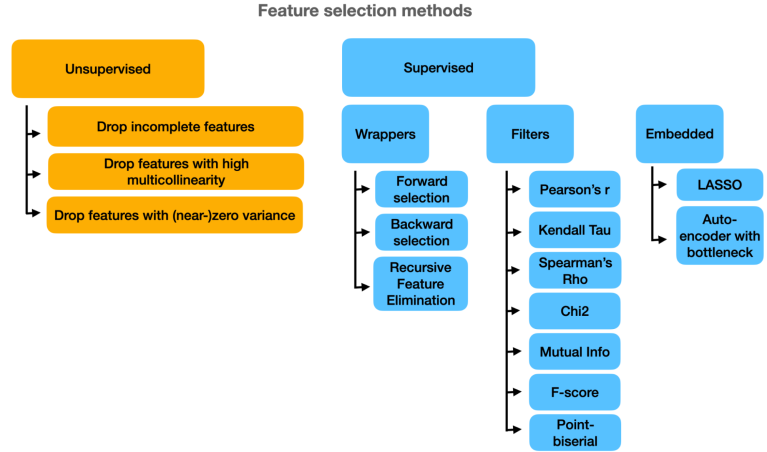




*   https://neptune.ai/blog/feature-selection-methods
*   https://en.wikipedia.org/wiki/Feature_selection#Main_principles
* https://scikit-learn.org/stable/modules/feature_selection.html



* **Approche graphique**: approche naive

*   **Unsupervised methods**: Low variance
*   **Wrapper methods**:
  * **Backward selection**: SequentialFeatureSelector Backward
  * **Forward selection**: SequentialFeatureSelector Forward
  * **Recursive Feature Elimination**: Recursive Feature Elimination,Tree-based feature selection, SelectFromModel
* **Filter method**: correlation analysis, Kbest



# Feature selection de chronique totale

## Approche naive par analyse des graphiques

In [13]:
col_totale_naive = ['mean_3', 'PIB', 'p95_3', 'mean_5', 'p95_5', 'mean_6', 'p95_6', 'CD_ETA_CIV_1', 'p95_1', 'p95_8', 'mean_1', 'p95_7',
                    'mean_4', 'mean_8', 'mean_7', 'Tx_cho', 'mean_2', 'CD_MOD_HABI_1', 'p95_4', 'p95_2']

On supprime la première ligne car elle peut biaiser le modèle, valeur de DR=0.024

                                 OLS Regression Results                                
Dep. Variable:                     DR   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                              9137.
Date:                Sun, 20 Nov 2022   Prob (F-statistic):                    4.44e-10
Time:                        14:12:46   Log-Likelihood:                          197.74
No. Observations:                  25   AIC:                                     -355.5
Df Residuals:                       5   BIC:                                     -331.1
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

Text(0.5, 1.0, 'mse =7.892663237702069e-09')

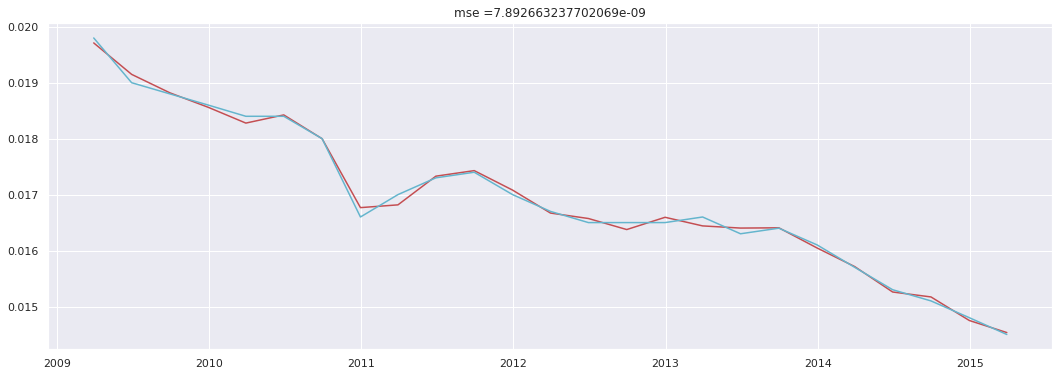

In [14]:
Xnaif = dft[col_totale_naive].iloc[1:,]
Ynaif = Yt[1:]
model = sm.OLS(Ynaif, Xnaif)
results = model.fit()
print(results.summary())
plt.plot(results.predict(Xnaif),color='r')
plt.plot(Ynaif,color='c')
from sklearn.metrics import mean_squared_error
plt.title('mse ='+ str(mean_squared_error(results.predict(Xnaif), Ynaif)))

En splitant les données en train et test

                            OLS Regression Results                            
Dep. Variable:                     DR   R-squared:                       0.997
Model:                            OLS   Adj. R-squared:                  0.937
Method:                 Least Squares   F-statistic:                     16.79
Date:                Sun, 20 Nov 2022   Prob (F-statistic):              0.190
Time:                        14:12:46   Log-Likelihood:                 173.90
No. Observations:                  21   AIC:                            -307.8
Df Residuals:                       1   BIC:                            -286.9
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
mean_3        -2.291e-05      0.000     -0.170

Text(0.5, 1.0, 'mse =5.102503065500528e-07')

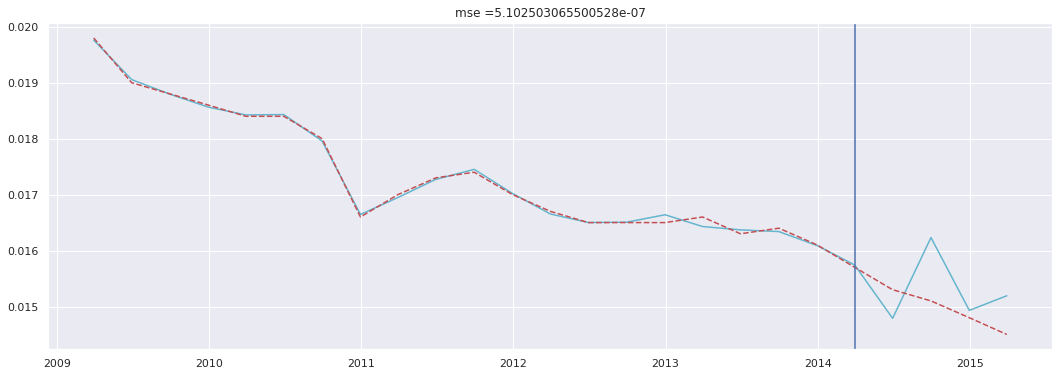

In [15]:
def split_data_naif(X,y,test_size):
  n = Xnaif.shape[0]
  i = int(n*(1-test_size))
  return X.iloc[:i,:], X.iloc[i:,:], y[:i], y[i:], y.index[i-1]
X_train_naif, X_test_naif, y_train_naif, y_test_naif, date_split = split_data_naif(Xnaif,Ynaif,0.15)

model = sm.OLS(y_train_naif, X_train_naif)
results = model.fit()
print(results.summary())
plt.plot(results.predict(Xnaif),color='c')
plt.plot(Ynaif,color='r',linestyle='dashed')
plt.axvline(x = date_split, color = 'b')
from sklearn.metrics import mean_squared_error
plt.title('mse ='+ str(mean_squared_error(results.predict(X_test_naif), y_test_naif)))

On enlève les variables avec une p-value très élévé (signigiant que l'hypothèse qu'il soit nul est acceptée)

In [16]:
new_col_totale_naive = col_totale_naive.copy()
new_col_totale_naive.remove('CD_ETA_CIV_1')
new_col_totale_naive.remove('p95_3')
new_col_totale_naive.remove('mean_1')
new_col_totale_naive.remove('p95_4')
n_Xnaif = Xnaif[new_col_totale_naive]

In [17]:
def split_data_naif(X,y,test_size):
  n = Xnaif.shape[0]
  i = int(n*(1-test_size))
  return X.iloc[:i,:], X.iloc[i:,:], y[:i], y[i:], y.index[i-1]
X_train_naif, X_test_naif, y_train_naif, y_test_naif, date_split = split_data_naif(n_Xnaif,Ynaif,0.15)

                                 OLS Regression Results                                
Dep. Variable:                     DR   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                              9098.
Date:                Sun, 20 Nov 2022   Prob (F-statistic):                    4.68e-10
Time:                        14:12:46   Log-Likelihood:                          163.27
No. Observations:                  21   AIC:                                     -294.5
Df Residuals:                       5   BIC:                                     -277.8
Df Model:                          16                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

Text(0.5, 1.0, 'mse =2.637224944445934e-07')

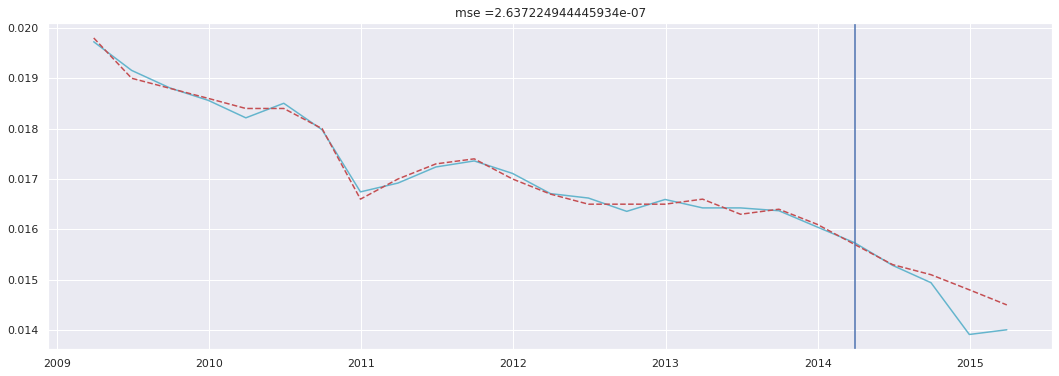

In [18]:
model = sm.OLS(y_train_naif, X_train_naif)
results = model.fit()
print(results.summary())
plt.plot(results.predict(n_Xnaif),color='c')
plt.plot(Ynaif,color='r',linestyle='dashed')
plt.axvline(x = date_split, color = 'b')
from sklearn.metrics import mean_squared_error
plt.title('mse ='+ str(mean_squared_error(results.predict(X_test_naif), y_test_naif)))

## Analyse des correlations

In [19]:
def corre(X,Y):
  X.insert(0, 'DR', Y)
  cor = X.corr()
  sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
  plt.savefig("abc.png")
  files.download("abc.png") 
  plt.show()

In [20]:
print(col_portefeuille)
       
print(col_clients)

print(col_macro) 

['mean_1', 'median_1', 'p5_1', 'p10_1', 'p25_1', 'p75_1', 'p90_1', 'p95_1', 'mean_2', 'median_2', 'p5_2', 'p10_2', 'p25_2', 'p75_2', 'p90_2', 'p95_2', 'mean_3', 'median_3', 'p5_3', 'p10_3', 'p25_3', 'p75_3', 'p90_3', 'p95_3', 'mean_4', 'median_4', 'p5_4', 'p10_4', 'p25_4', 'p75_4', 'p90_4', 'p95_4', 'mean_5', 'median_5', 'p5_5', 'p10_5', 'p25_5', 'p75_5', 'p90_5', 'p95_5', 'mean_6', 'median_6', 'p5_6', 'p10_6', 'p25_6', 'p75_6', 'p90_6', 'p95_6', 'mean_7', 'median_7', 'p5_7', 'p10_7', 'p25_7', 'p75_7', 'p90_7', 'p95_7', 'mean_8', 'median_8', 'p5_8', 'p10_8', 'p25_8', 'p75_8', 'p90_8', 'p95_8']
['CD_TY_CLI_RCI_1', 'CD_ETA_CIV_1', 'CD_MOD_HABI_1', 'CD_PROF_1', 'CD_PROF_2', 'CD_QUAL_VEH_1']
['PIB', 'Inflation', 'Tx_cho']


### Analyse des variables caractéristiques du portfeuille

In [21]:
col_totale_corr = []

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

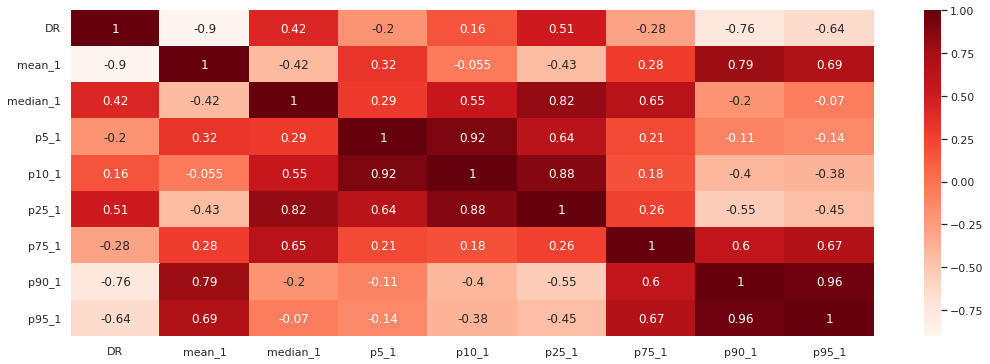

In [22]:
# Note d'octroi recalulée
corre(Xt[col_portefeuille[0:8]],Yt)

In [23]:
# We are keeping the only two best correlated features with DR
col_totale_corr += ['mean_1','p90_1']

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

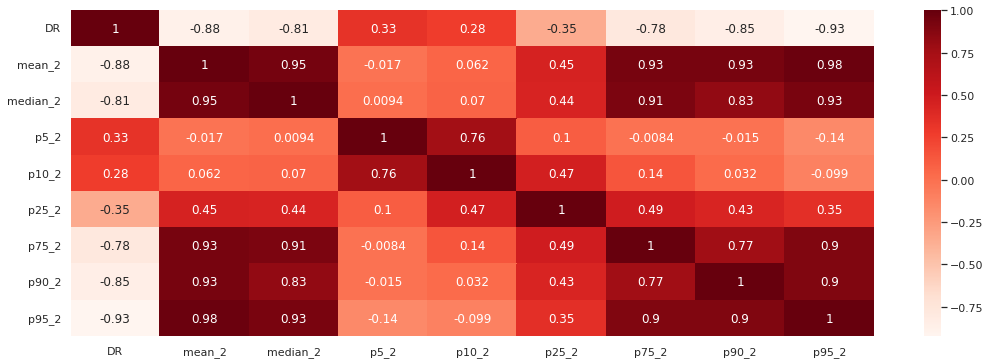

In [24]:
#Durée écoulée depuis le dernier impayé
corre(Xt[col_portefeuille[8:16]],Yt)

In [25]:
# We are keeping the only two best correlated features with DR
col_totale_corr += ['mean_2','p90_2']

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

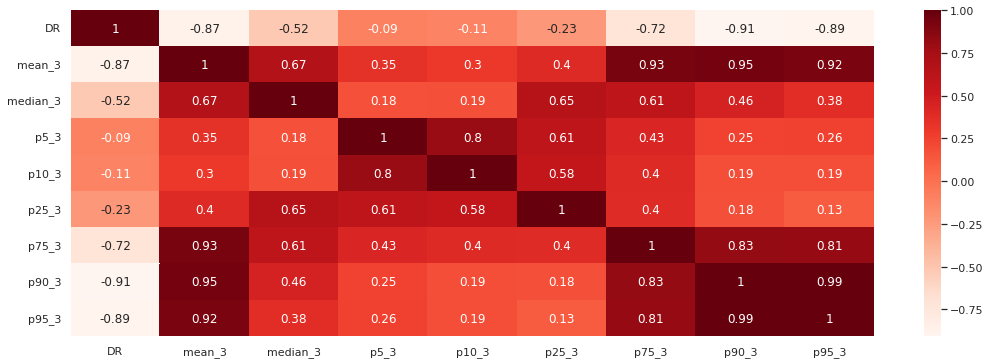

In [26]:
# Durée de l'impayé encours
corre(Xt[col_portefeuille[16:24]],Yt)

In [27]:
col_totale_corr += ['mean_3','p90_3','p95_3']

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

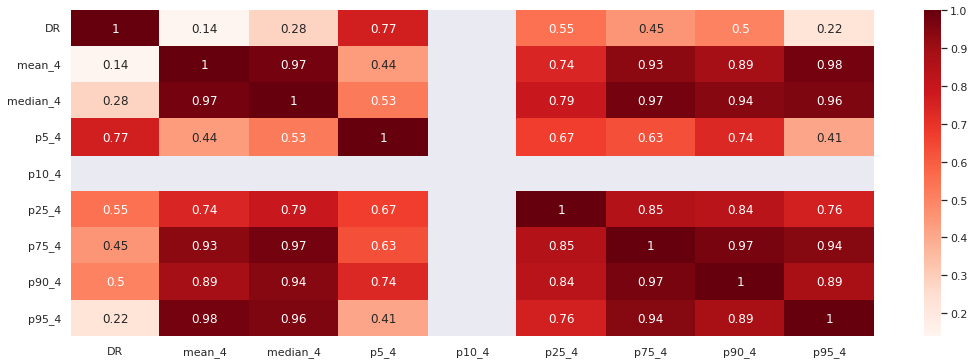

In [28]:
# Durée maximale de l'impayé
corre(Xt[col_portefeuille[24:32]],Yt)

In [29]:
col_totale_corr += ['p5_4']

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

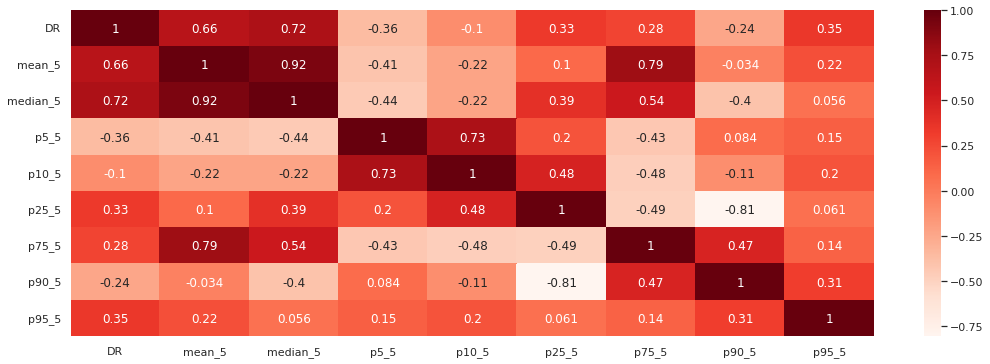

In [30]:
# Créance après répartition solde créditeurs
corre(Xt[col_portefeuille[32:40]],Yt)

In [31]:
col_totale_corr += ['median_5']

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

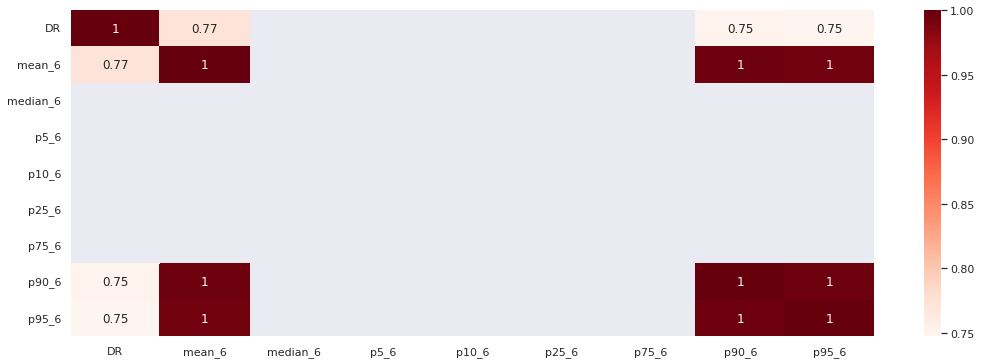

In [32]:
# Ratio nombre d'incidents régularisés enregistrés depuis la date d'entrée en gestion
corre(Xt[col_portefeuille[40:48]],Yt)

In [33]:
col_totale_corr += ['mean_6','p90_6','p95_6']

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

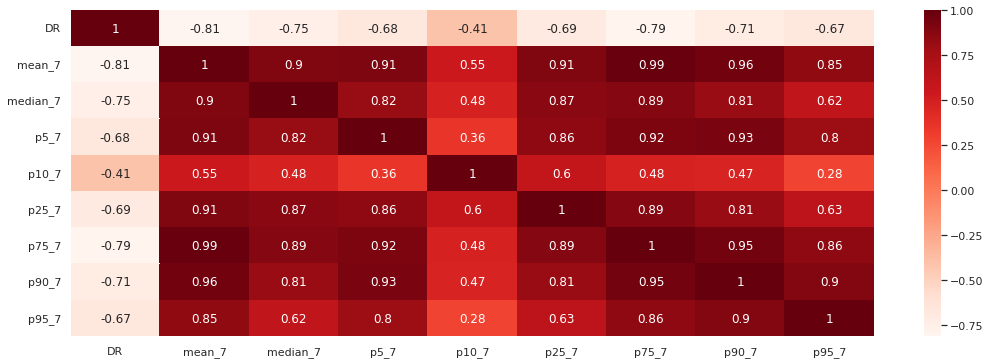

In [34]:
# Ratio rang du premier impayé régularisé par rapport à la durée prévue du contrat
corre(Xt[col_portefeuille[48:56]],Yt)

In [35]:
col_totale_corr += ['mean_7','median_7','p75_7']

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

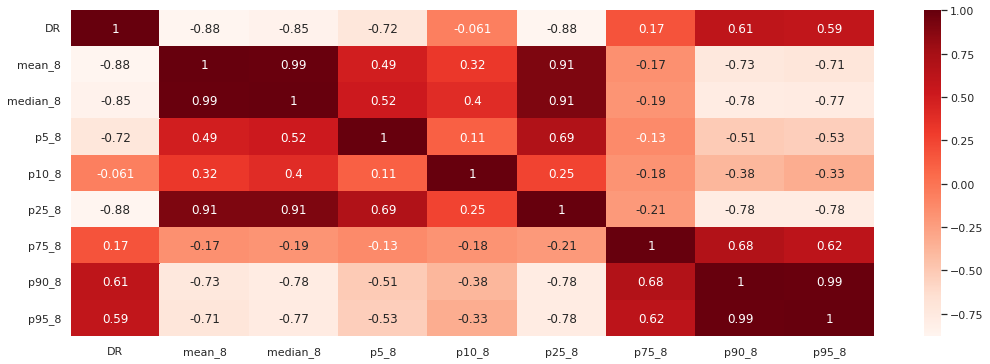

In [36]:
# Pourcentage apport
corre(Xt[col_portefeuille[56:64]],Yt)

In [37]:
col_totale_corr += ['mean_8','median_8','p25_8']

### Analyse des variables caractéristiques des clients

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

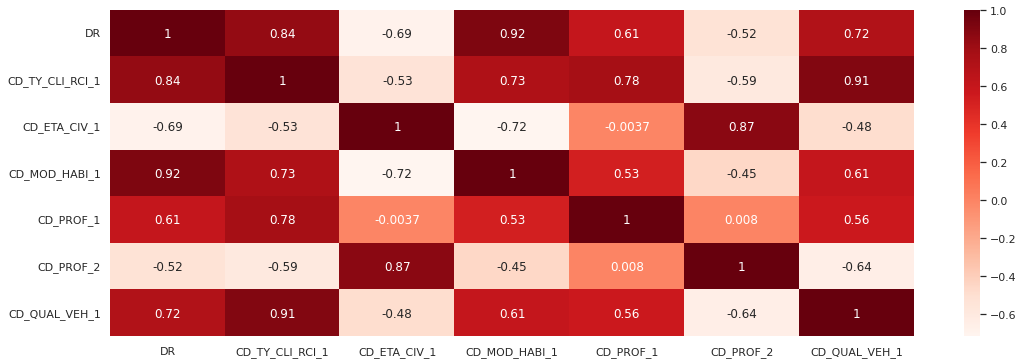

In [38]:
corre(Xt[col_clients],Yt)

In [39]:
col_totale_corr += ['CD_TY_CLI_RCI_1','CD_MOD_HABI_1','CD_QUAL_VEH_1']

### Analyse des variables macro

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

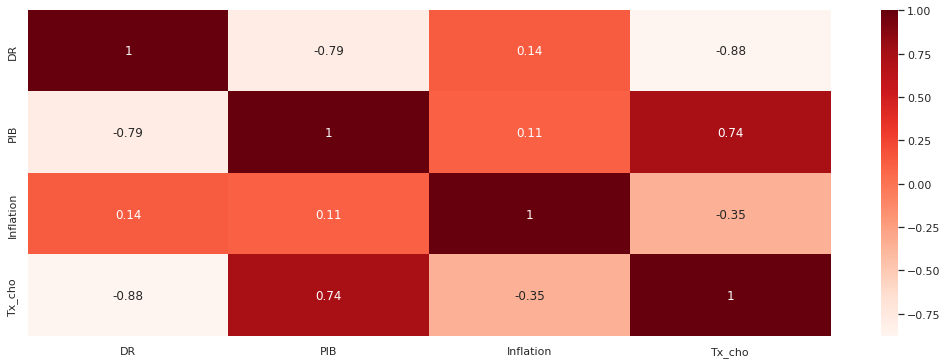

In [40]:
corre(Xt[col_macro],Yt)

In [41]:
col_totale_corr += ['PIB','Tx_cho']

### Multicollinéarité test
On va analyser les différentes colonnes obtenues et enlever les variables qui sont trop colinéaires entre elles

In [42]:
def keep_col(df,tresholdDR,interTreshold):
  df_temp = df.copy()
  df_temp.insert(loc=0, column='DR', value=Y.values)
  corr_matrix = df_temp.corr()
  *index, = map(lambda x: abs(x)>tresholdDR,corr_matrix.loc['DR'])
  print('Columns with corr with DR >' +str(tresholdDR)+':',df_temp.columns[index].values[1:],str(index.count(True)-1)+' variables',sep='\n')
  
  print('\n','After studying inter correlation')
  keep_col = set()
  cols = df_temp.columns[index].values[1:]
  for col1 in cols:
    for col2 in cols:
      if col1 != col2 and abs(corr_matrix.loc[col1,col2])>interTreshold:
        col_to_keep =corr_matrix.loc['DR',[col1,col2]].idxmax()
        keep_col.add(col_to_keep)
  print('Columns with inter corr<' +str(interTreshold)+':',keep_col,str(len(keep_col))+' variables',sep='\n')
  return list(keep_col)

In [43]:
col_totale_corr = keep_col(Xt[col_totale_corr],0.60,0.90)

Columns with corr with DR >0.6:
['mean_1' 'p90_1' 'mean_2' 'p90_2' 'mean_3' 'p90_3' 'p95_3' 'p5_4'
 'median_5' 'mean_6' 'p90_6' 'p95_6' 'mean_7' 'median_7' 'p75_7' 'mean_8'
 'median_8' 'p25_8' 'CD_TY_CLI_RCI_1' 'CD_MOD_HABI_1' 'CD_QUAL_VEH_1'
 'PIB' 'Tx_cho']
23 variables

 After studying inter correlation
Columns with inter corr<0.9:
{'p95_6', 'mean_7', 'median_5', 'median_8', 'p90_6', 'mean_8', 'CD_QUAL_VEH_1', 'p75_7', 'CD_TY_CLI_RCI_1', 'mean_1', 'mean_6', 'median_7', 'p90_2', 'p95_3', 'CD_MOD_HABI_1', 'mean_3', 'p90_1', 'mean_2', 'PIB'}
19 variables


### Conclusion

In [44]:
print(f'Il y a {len(col_totale_corr)} variables:', col_totale_corr,sep='\n')

Il y a 19 variables:
['p95_6', 'mean_7', 'median_5', 'median_8', 'p90_6', 'mean_8', 'CD_QUAL_VEH_1', 'p75_7', 'CD_TY_CLI_RCI_1', 'mean_1', 'mean_6', 'median_7', 'p90_2', 'p95_3', 'CD_MOD_HABI_1', 'mean_3', 'p90_1', 'mean_2', 'PIB']


On garde cette sélection de variables que l'on va ajouter dans notre fichier columns.py

## Low variance method

In [45]:
from sklearn.feature_selection import VarianceThreshold
vt = VarianceThreshold(threshold =0.25).fit(Xt)
col_totale_vt = Xt.loc[:,vt.get_support()].columns
print(f'Il y a {len(col_totale_vt)} variables:', col_totale_vt,sep='\n')

Il y a 33 variables:
Index(['mean_2', 'median_2', 'p5_2', 'p10_2', 'p25_2', 'p75_2', 'p90_2',
       'p95_2', 'mean_3', 'median_3', 'p5_3', 'p10_3', 'p25_3', 'p75_3',
       'p90_3', 'p95_3', 'mean_4', 'median_4', 'p25_4', 'p75_4', 'p90_4',
       'p95_4', 'mean_5', 'median_5', 'p5_5', 'p10_5', 'p25_5', 'p75_5',
       'p90_5', 'p95_5', 'PIB', 'Inflation', 'Tx_cho'],
      dtype='object')


## Kbest method

In [46]:
from sklearn.feature_selection import SelectKBest, f_regression
kb = SelectKBest(f_regression, k=20).fit(Xt, Yt)
col_totale_kb = Xt.loc[:,kb.get_support()].columns
print(f'Il y a {len(col_totale_kb)} variables:', col_totale_kb,sep='\n')

Il y a 20 variables:
Index(['mean_1', 'mean_2', 'median_2', 'p75_2', 'p90_2', 'p95_2', 'mean_3',
       'p90_3', 'p95_3', 'p5_4', 'mean_6', 'mean_7', 'p75_7', 'mean_8',
       'median_8', 'p25_8', 'CD_TY_CLI_RCI_1', 'CD_MOD_HABI_1', 'PIB',
       'Tx_cho'],
      dtype='object')


/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: divide by zero encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:358: RuntimeWarning: invalid value encountered in true_divide
  f_statistic = corr_coef_squared / (1 - corr_coef_squared) * deg_of_freedom


## Recursive feature elimination with cross-validation to select features.



In [47]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression

linreg = LinearRegression(fit_intercept=False)
rfecv = RFECV(linreg, step=1, min_features_to_select=15, cv=8).fit(Xt, Yt)
col_totale_rfecv = Xt.loc[:,rfecv.get_support()].columns
print(f'Il y a {len(col_totale_rfecv)} variables:', col_totale_rfecv,sep='\n')

Il y a 26 variables:
Index(['mean_1', 'median_1', 'p5_1', 'p10_1', 'p25_1', 'median_4', 'p5_4',
       'p10_4', 'p25_4', 'p5_7', 'p10_7', 'p25_7', 'p90_7', 'p95_7', 'mean_8',
       'median_8', 'p5_8', 'p10_8', 'p25_8', 'p75_8', 'p90_8', 'CD_ETA_CIV_1',
       'CD_MOD_HABI_1', 'CD_PROF_2', 'CD_QUAL_VEH_1', 'Tx_cho'],
      dtype='object')


## Feature selection using SelectFromModel

In [48]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression
linreg = LinearRegression(fit_intercept=False)
sfm = SelectFromModel(linreg).fit(Xt, Yt)
col_totale_sfm  = Xt.loc[:,sfm .get_support()].columns
print(f'Il y a {len(col_totale_sfm )} variables:', col_totale_sfm ,sep='\n')

Il y a 17 variables:
Index(['mean_2', 'median_2', 'p10_2', 'p75_2', 'p5_3', 'p10_3', 'p25_3',
       'p75_3', 'p90_3', 'p95_3', 'mean_4', 'median_4', 'p5_4', 'p25_4',
       'p75_4', 'p90_4', 'Inflation'],
      dtype='object')


## Tree-based feature selection

In [49]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.feature_selection import SelectFromModel
etc = ExtraTreesRegressor(n_estimators=50).fit(Xt, Yt)
sfm2 = SelectFromModel(etc, prefit=True)
col_totale_sfm2  = Xt.loc[:,sfm2 .get_support()].columns
print(f'Il y a {len(col_totale_sfm2 )} variables:', col_totale_sfm2 ,sep='\n')

Il y a 21 variables:
Index(['mean_1', 'mean_2', 'p75_2', 'p95_2', 'p75_3', 'p90_3', 'p95_3',
       'mean_4', 'p5_4', 'p25_4', 'p75_4', 'p90_4', 'p95_4', 'p10_5', 'p25_5',
       'mean_8', 'p5_8', 'p25_8', 'CD_QUAL_VEH_1', 'PIB', 'Tx_cho'],
      dtype='object')


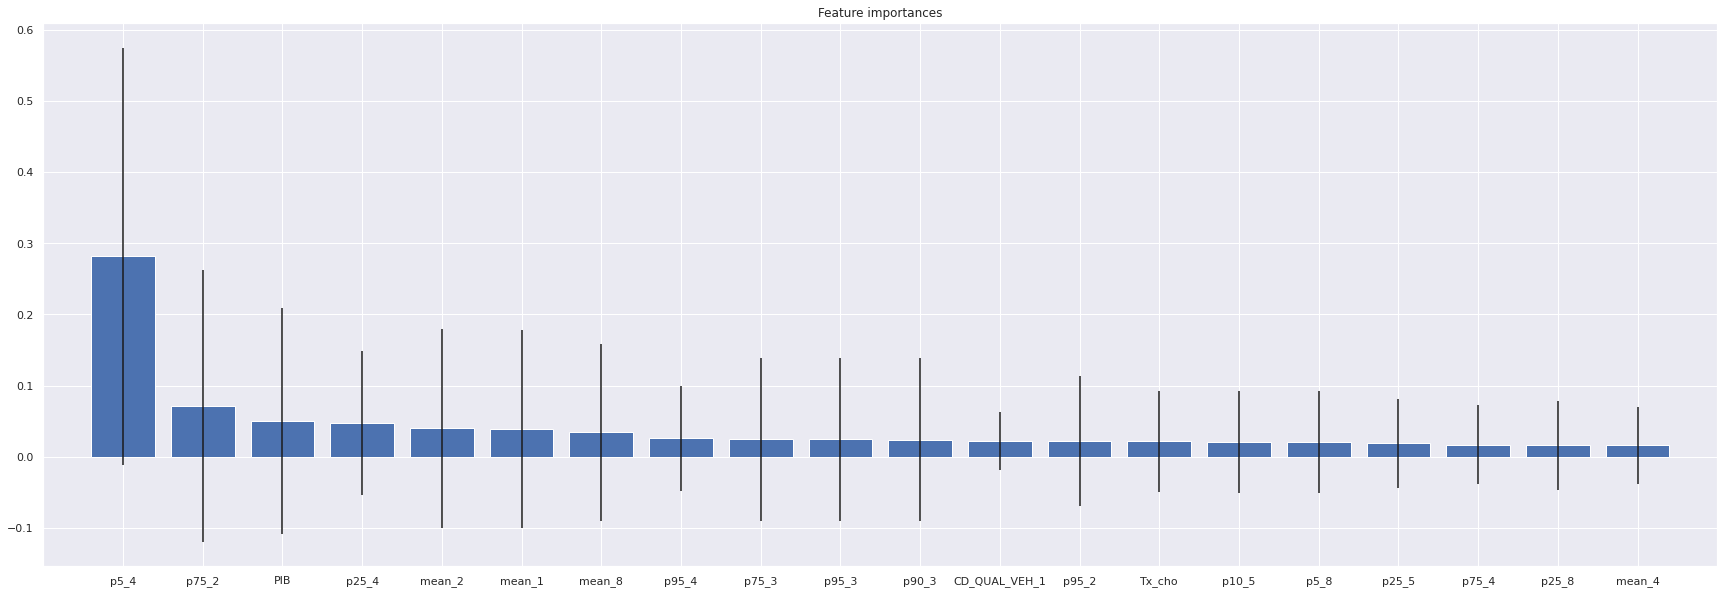

In [50]:
#plot the importances #
importances = etc.feature_importances_
std = np.std([tree.feature_importances_ for tree in etc.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1][:20]
indices_names = list(map(lambda x : Xt.columns[x],indices))
plt.figure(figsize=(30,10))
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices],
       color="b", yerr=std[indices], align="center")
plt.xticks(range(len(indices)), indices_names)
plt.xlim([-1, len(indices)])
plt.show()

## Sequential Feature Selection 

In [51]:
# forward
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector
linreg = LinearRegression(fit_intercept=False)
sfs_forward = SequentialFeatureSelector(linreg, n_features_to_select=20, direction='forward').fit(Xt, Yt)
col_totale_sfs_forward  = Xt.loc[:,sfs_forward .get_support()].columns
print(f'Il y a {len(col_totale_sfs_forward )} variables:', col_totale_sfs_forward ,sep='\n')

Il y a 20 variables:
Index(['p10_2', 'mean_3', 'p5_3', 'p10_3', 'p25_3', 'p75_3', 'mean_4',
       'median_4', 'p25_4', 'p75_4', 'p95_4', 'mean_6', 'median_6', 'p5_6',
       'p10_6', 'p25_6', 'p75_6', 'p5_7', 'p25_7', 'p5_8'],
      dtype='object')


In [52]:
# backward
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector
linreg = LinearRegression(fit_intercept=False)
sfs_backward = SequentialFeatureSelector(linreg, n_features_to_select=20, direction='backward').fit(Xt, Yt)
col_totale_sfs_backward  = Xt.loc[:,sfs_backward .get_support()].columns
print(f'Il y a {len(col_totale_sfs_backward )} variables:', col_totale_sfs_backward ,sep='\n')

Il y a 20 variables:
Index(['mean_2', 'p5_2', 'p10_2', 'p25_2', 'p75_2', 'mean_3', 'p5_3', 'p75_3',
       'p90_3', 'p95_3', 'median_4', 'p25_4', 'p95_4', 'mean_5', 'median_5',
       'p5_5', 'p10_5', 'p25_5', 'p90_5', 'PIB'],
      dtype='object')


## Show what feature was selected

In [53]:
cols_feature_selection = [new_col_totale_naive,col_totale_corr,col_totale_vt,col_totale_kb,col_totale_rfecv,col_totale_sfm,col_totale_sfm2,col_totale_sfs_forward,col_totale_sfs_backward]
method = ['Approche naive', 'Methode correlation','Low variance methode','Methode Kbest','Methode RFECV','Methode SelectFromModel','Method Tree','Methode sequential forward','Methode sequential backward']

In [54]:
for cols, met in zip(cols_feature_selection,method):
  print('-'*40)
  print(f'{met}: {len(cols)} variables')
  print(*cols)
print('-'*40,end='\n')

----------------------------------------
Approche naive: 16 variables
mean_3 PIB mean_5 p95_5 mean_6 p95_6 p95_1 p95_8 p95_7 mean_4 mean_8 mean_7 Tx_cho mean_2 CD_MOD_HABI_1 p95_2
----------------------------------------
Methode correlation: 19 variables
p95_6 mean_7 median_5 median_8 p90_6 mean_8 CD_QUAL_VEH_1 p75_7 CD_TY_CLI_RCI_1 mean_1 mean_6 median_7 p90_2 p95_3 CD_MOD_HABI_1 mean_3 p90_1 mean_2 PIB
----------------------------------------
Low variance methode: 33 variables
mean_2 median_2 p5_2 p10_2 p25_2 p75_2 p90_2 p95_2 mean_3 median_3 p5_3 p10_3 p25_3 p75_3 p90_3 p95_3 mean_4 median_4 p25_4 p75_4 p90_4 p95_4 mean_5 median_5 p5_5 p10_5 p25_5 p75_5 p90_5 p95_5 PIB Inflation Tx_cho
----------------------------------------
Methode Kbest: 20 variables
mean_1 mean_2 median_2 p75_2 p90_2 p95_2 mean_3 p90_3 p95_3 p5_4 mean_6 mean_7 p75_7 mean_8 median_8 p25_8 CD_TY_CLI_RCI_1 CD_MOD_HABI_1 PIB Tx_cho
----------------------------------------
Methode RFECV: 26 variables
mean_1 median_1 

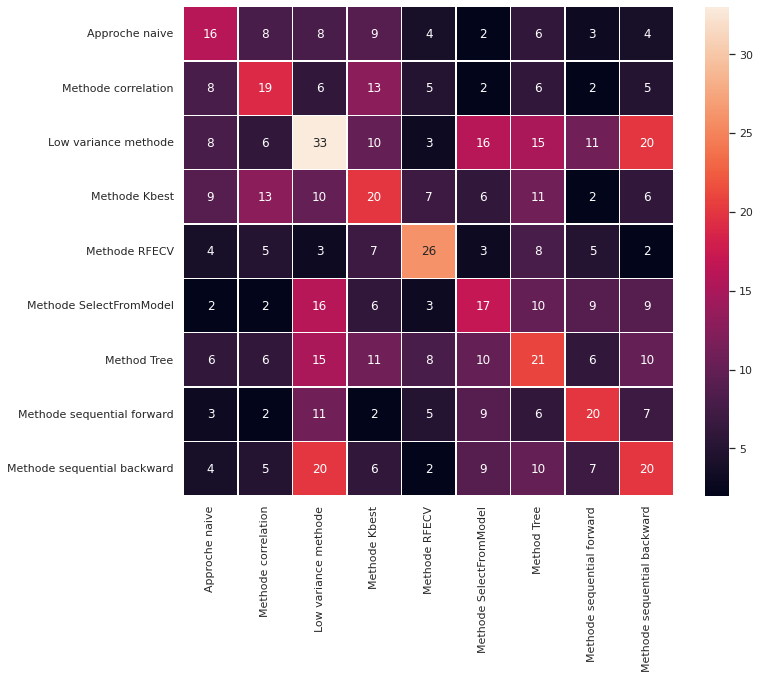

In [55]:
import itertools
df_common = pd.DataFrame(columns=method, index=method)
for i, j in itertools.product(range(len(method)),range(len(method))):
  col1, col2 = cols_feature_selection[i], cols_feature_selection[j]
  method1, method2 = method[i], method[j]
  n_common = len(set(col1).intersection(col2))
  df_common.loc[method1,method2] = n_common

fig, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(df_common.astype('float64'), annot=True,linewidth=.5,ax=ax)
plt.show()

# Feature selection de chronique 2

## Approche naive par analyse des graphiques 

In [56]:
X2.columns

Index(['mean_1', 'median_1', 'p5_1', 'p10_1', 'p25_1', 'p75_1', 'p90_1',
       'p95_1', 'mean_2', 'median_2', 'p5_2', 'p10_2', 'p25_2', 'p75_2',
       'p90_2', 'p95_2', 'mean_3', 'median_3', 'p5_3', 'p10_3', 'p25_3',
       'p75_3', 'p90_3', 'p95_3', 'mean_4', 'median_4', 'p5_4', 'p10_4',
       'p25_4', 'p75_4', 'p90_4', 'p95_4', 'mean_5', 'median_5', 'p5_5',
       'p10_5', 'p25_5', 'p75_5', 'p90_5', 'p95_5', 'mean_6', 'median_6',
       'p5_6', 'p10_6', 'p25_6', 'p75_6', 'p90_6', 'p95_6', 'mean_7',
       'median_7', 'p5_7', 'p10_7', 'p25_7', 'p75_7', 'p90_7', 'p95_7',
       'mean_8', 'median_8', 'p5_8', 'p10_8', 'p25_8', 'p75_8', 'p90_8',
       'p95_8', 'CD_TY_CLI_RCI_1', 'CD_ETA_CIV_1', 'CD_MOD_HABI_1',
       'CD_PROF_1', 'CD_PROF_2', 'CD_QUAL_VEH_1', 'PIB', 'Inflation',
       'Tx_cho'],
      dtype='object')

In [57]:
col_2_naive = [ 'median_1', 'p25_1', 'median_2', 'mean_4', 'mean_5', 'median_5','p90_5', 'p95_5', 
             
       'mean_8', 'median_8','p10_8', 'p25_8',  'CD_MOD_HABI_1',
       'CD_PROF_1', 'CD_PROF_2', 'CD_QUAL_VEH_1', 'PIB', 
       'Tx_cho']

On supprime la première ligne car elle peut biaiser le modèle, valeur de DR=0.024

                                 OLS Regression Results                                
Dep. Variable:                     DR   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              0.998
Method:                 Least Squares   F-statistic:                              820.2
Date:                Sun, 20 Nov 2022   Prob (F-statistic):                    6.74e-10
Time:                        14:13:31   Log-Likelihood:                          213.87
No. Observations:                  25   AIC:                                     -391.7
Df Residuals:                       7   BIC:                                     -369.8
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

Text(0.5, 1.0, 'mse =2.172142456292222e-09')

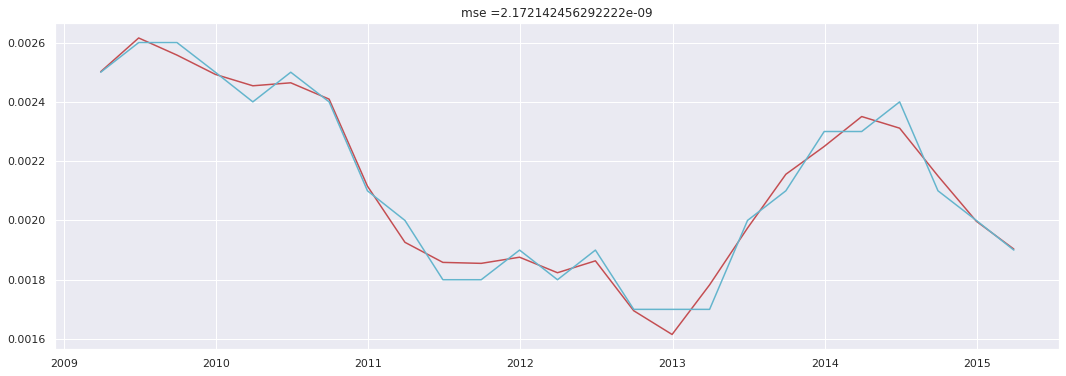

In [58]:
Xnaif = df2[col_2_naive].iloc[1:,]
Ynaif = Y2[1:]
model = sm.OLS(Ynaif, Xnaif)
results = model.fit()
print(results.summary())
plt.plot(results.predict(Xnaif),color='r')
plt.plot(Ynaif,color='c')
from sklearn.metrics import mean_squared_error
plt.title('mse ='+ str(mean_squared_error(results.predict(Xnaif), Ynaif)))

En splitant les données en train et test

                                 OLS Regression Results                                
Dep. Variable:                     DR   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              0.997
Method:                 Least Squares   F-statistic:                              435.8
Date:                Sun, 20 Nov 2022   Prob (F-statistic):                    0.000158
Time:                        14:13:31   Log-Likelihood:                          181.85
No. Observations:                  21   AIC:                                     -327.7
Df Residuals:                       3   BIC:                                     -308.9
Df Model:                          18                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

Text(0.5, 1.0, 'mse =1.837757739427946e-08')

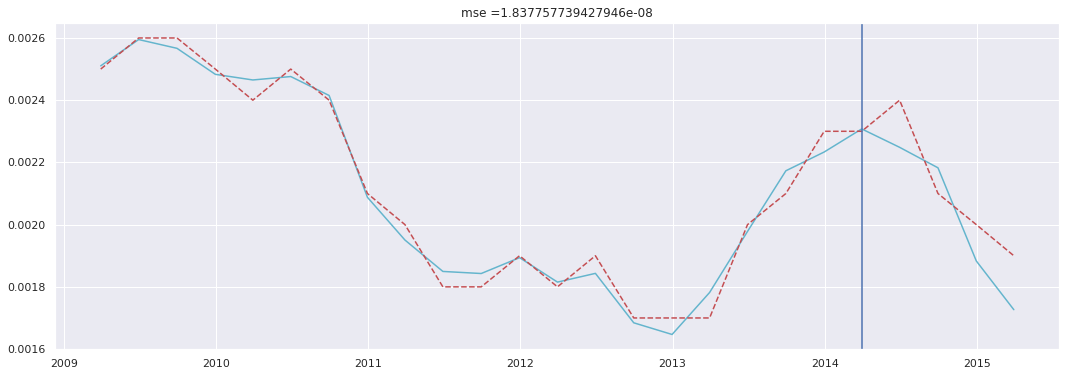

In [59]:
def split_data_naif(X,y,test_size):
  n = Xnaif.shape[0]
  i = int(n*(1-test_size))
  return X.iloc[:i,:], X.iloc[i:,:], y[:i], y[i:], y.index[i-1]
X_train_naif, X_test_naif, y_train_naif, y_test_naif, date_split = split_data_naif(Xnaif,Ynaif,0.15)

model = sm.OLS(y_train_naif, X_train_naif)
results = model.fit()
print(results.summary())
plt.plot(results.predict(Xnaif),color='c')
plt.plot(Ynaif,color='r',linestyle='dashed')
plt.axvline(x = date_split, color = 'b')
from sklearn.metrics import mean_squared_error
plt.title('mse ='+ str(mean_squared_error(results.predict(X_test_naif), y_test_naif)))

On enlève les variables avec une pvalue très élévé (signigiant que l'hypothèse qu'il soit nul est validé)

In [60]:
new_col_2_naive = col_2_naive.copy()
new_col_2_naive.remove('CD_PROF_2')
new_col_2_naive.remove('mean_8')
new_col_2_naive.remove('median_1')
new_col_2_naive.remove('CD_MOD_HABI_1')
n_Xnaif = Xnaif[new_col_2_naive]

In [61]:
def split_data_naif(X,y,test_size):
  n = Xnaif.shape[0]
  i = int(n*(1-test_size))
  return X.iloc[:i,:], X.iloc[i:,:], y[:i], y[i:], y.index[i-1]
X_train_naif, X_test_naif, y_train_naif, y_test_naif, date_split = split_data_naif(n_Xnaif,Ynaif,0.15)

                                 OLS Regression Results                                
Dep. Variable:                     DR   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              0.999
Method:                 Least Squares   F-statistic:                              1116.
Date:                Sun, 20 Nov 2022   Prob (F-statistic):                    2.57e-10
Time:                        14:13:32   Log-Likelihood:                          180.18
No. Observations:                  21   AIC:                                     -332.4
Df Residuals:                       7   BIC:                                     -317.7
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------

Text(0.5, 1.0, 'mse =2.676717306254213e-08')

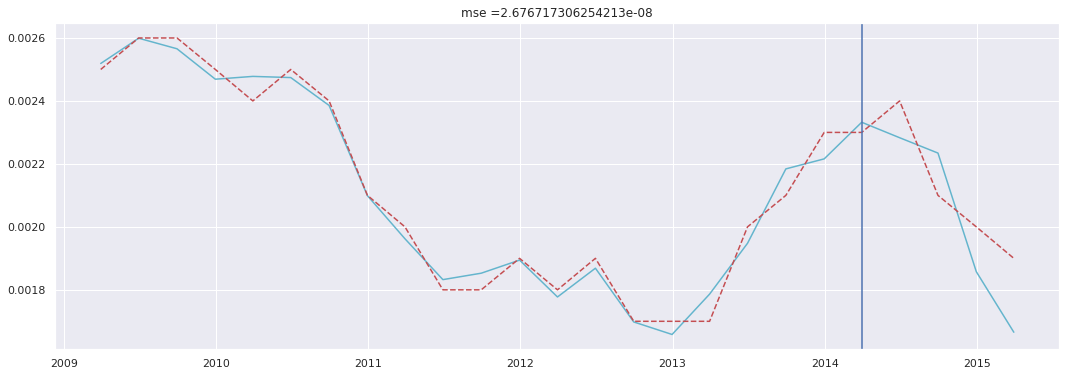

In [62]:
model = sm.OLS(y_train_naif, X_train_naif)
results = model.fit()
print(results.summary())
plt.plot(results.predict(n_Xnaif),color='c')
plt.plot(Ynaif,color='r',linestyle='dashed')
plt.axvline(x = date_split, color = 'b')
from sklearn.metrics import mean_squared_error
plt.title('mse ='+ str(mean_squared_error(results.predict(X_test_naif), y_test_naif)))

## Analyse des correlations

In [63]:
def corre(X,Y):
  X.insert(0, 'DR', Y)
  cor = X.corr()
  sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
  plt.show()

### Analyse des variables caractéristiques du portfeuille

In [64]:
col_2_corr = []

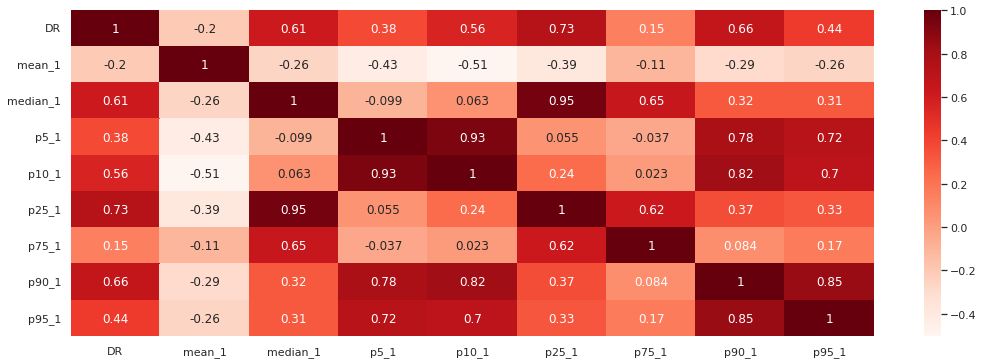

In [65]:
# Note d'octroi recalulée
corre(X2[col_portefeuille[0:8]],Y2)

In [66]:
col_2_corr += ['p25_1']

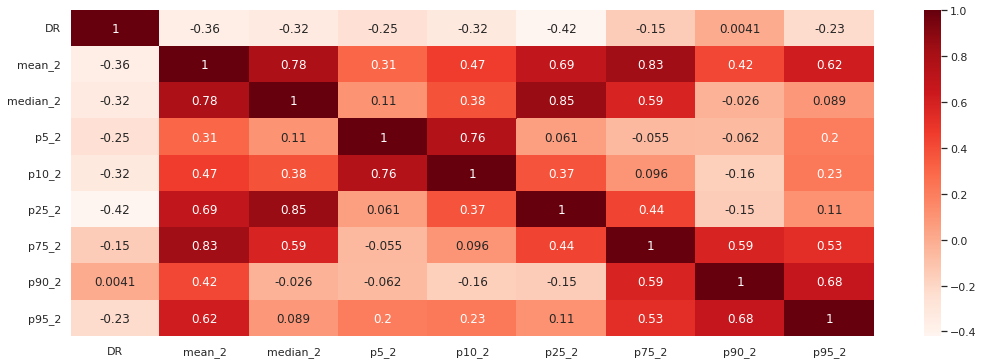

In [67]:
#Durée écoulée depuis le dernier impayé
corre(X2[col_portefeuille[8:16]],Y2)

In [68]:
#col_2_corr += []

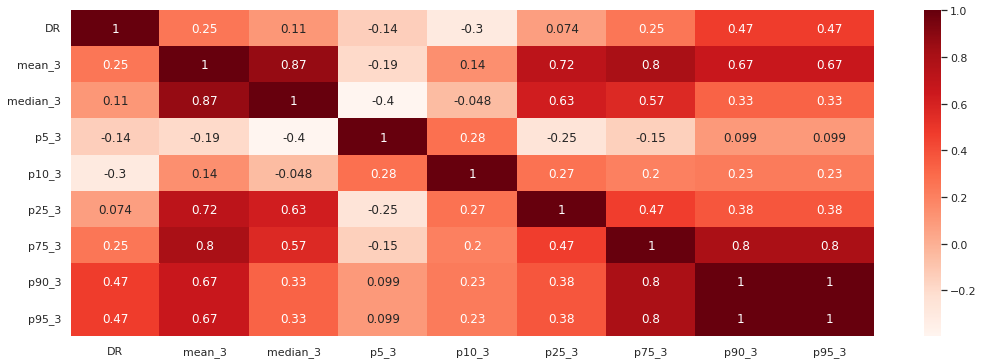

In [69]:
# Durée de l'impayé encours
corre(X2[col_portefeuille[16:24]],Y2)

In [70]:
#col_2_corr += ['p_90_3','p_95_3']

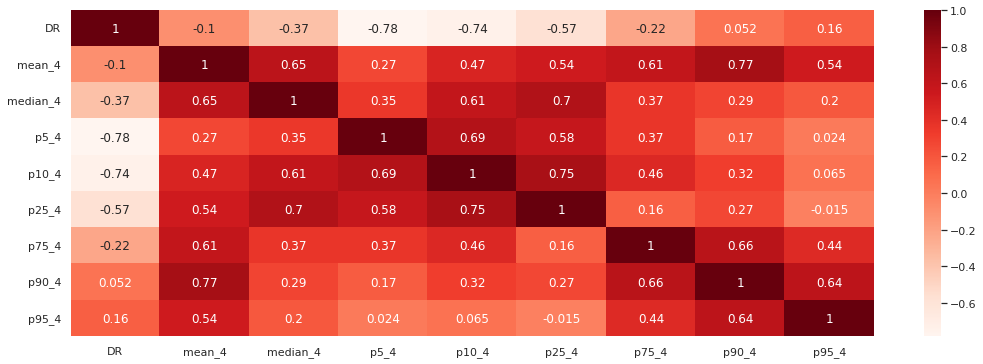

In [71]:
# Durée maximale de l'impayé
corre(X2[col_portefeuille[24:32]],Y2)

In [72]:
col_2_corr += ['p5_4','p10_4']

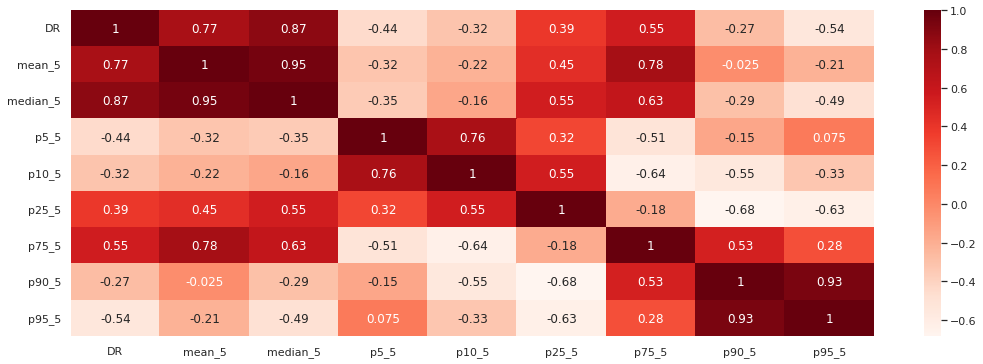

In [73]:
# Créance après répartition solde créditeurs
corre(X2[col_portefeuille[32:40]],Y2)

In [74]:
col_2_corr += ['mean_5','median_5']

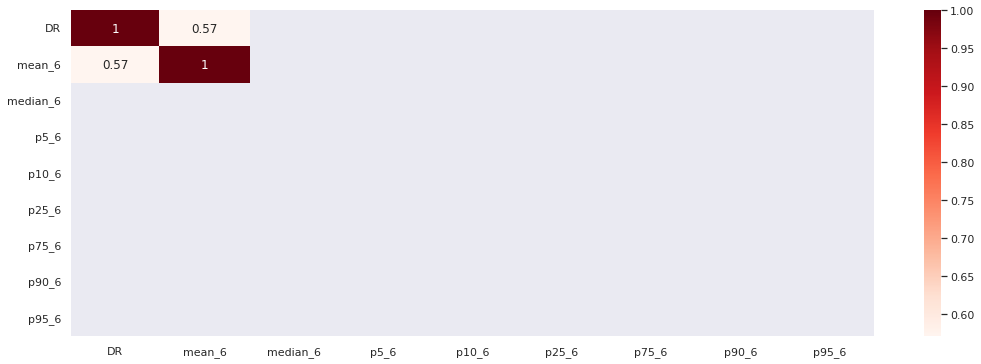

In [75]:
# Ratio nombre d'incidents régularisés enregistrés depuis la date d'entrée en gestion
corre(X2[col_portefeuille[40:48]],Y2)

In [76]:
#col_2_corr += ['mean_6','p90_6','p95_6']

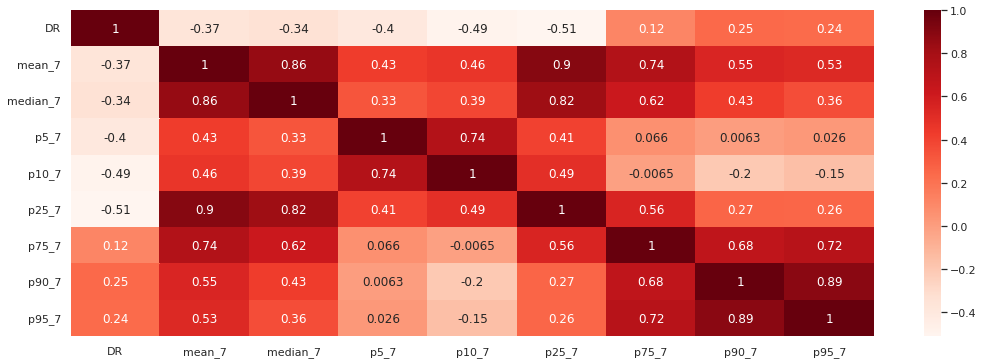

In [77]:
# Ratio rang du premier impayé régularisé par rapport à la durée prévue du contrat
corre(X2[col_portefeuille[48:56]],Y2)

In [78]:
#col_2_corr += ['mean_7','median_7','p75_7']

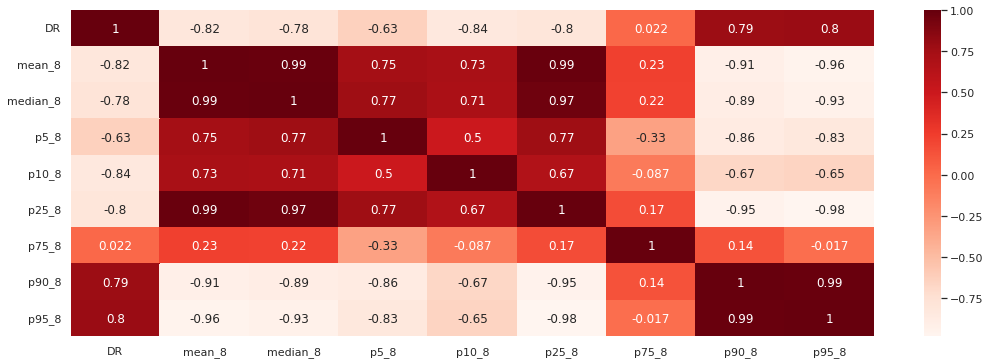

In [79]:
# Pourcentage apport
corre(X2[col_portefeuille[56:64]],Y2)

In [80]:
col_2_corr += ['mean_8','median_8','p10_8','p25_8','p90_8']

### Analyse des variables caractéristiques des clients

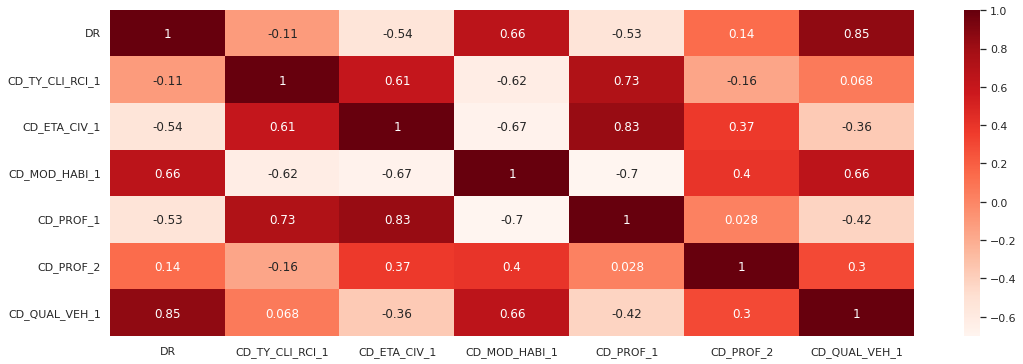

In [81]:
corre(X2[col_clients],Y2)

In [82]:
col_2_corr += ['CD_MOD_HABI_1','CD_QUAL_VEH_1']

### Analyse des variables macro

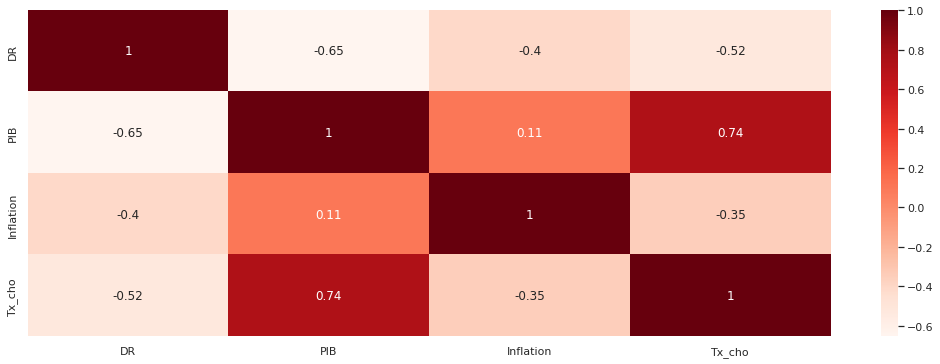

In [83]:
corre(X2[col_macro],Y2)

In [84]:
col_2_corr += ['PIB','Tx_cho']

### Multicollinéarité test
On va analyser les différentes colonnes obtenues et enlever les variables qui sont trop colinéaires entre elles

In [85]:
def keep_col(df,tresholdDR,interTreshold):
  df_temp = df.copy()
  df_temp.insert(loc=0, column='DR', value=Y2.values)
  corr_matrix = df_temp.corr()
  *index, = map(lambda x: abs(x)>tresholdDR,corr_matrix.loc['DR'])
  print('Columns with corr with DR >' +str(tresholdDR)+':',df_temp.columns[index].values[1:],str(index.count(True)-1)+' variables',sep='\n')
  
  print('\n','After studying inter correlation')
  keep_col = set()
  cols = df_temp.columns[index].values[1:]
  for col1 in cols:
    for col2 in cols:
      if col1 != col2 and abs(corr_matrix.loc[col1,col2])>interTreshold:
        col_to_keep =corr_matrix.loc['DR',[col1,col2]].idxmax()
        keep_col.add(col_to_keep)
  print('Columns with inter corr<' +str(interTreshold)+':',keep_col,str(len(keep_col))+' variables',sep='\n')
  return list(keep_col)

In [86]:
col_2_corr = keep_col(Xt[col_2_corr],0.60,0.90)

Columns with corr with DR >0.6:
['p5_4' 'mean_5' 'median_5' 'mean_8' 'median_8' 'p25_8' 'p90_8'
 'CD_QUAL_VEH_1' 'PIB']
9 variables

 After studying inter correlation
Columns with inter corr<0.9:
{'mean_8', 'CD_QUAL_VEH_1', 'mean_5', 'p25_8', 'median_5'}
5 variables


### Conclusion

In [87]:
col_2_corr = list(set(col_2_corr))
print(f'Il y a {len(col_2_corr)} variables:', col_2_corr,sep='\n')

Il y a 5 variables:
['mean_8', 'CD_QUAL_VEH_1', 'mean_5', 'p25_8', 'median_5']


## Low variance method

In [88]:
from sklearn.feature_selection import VarianceThreshold
vt = VarianceThreshold(threshold =0.25).fit(X2)
col_2_vt = X2.loc[:,vt.get_support()].columns
print(f'Il y a {len(col_2_vt)} variables:', col_2_vt,sep='\n')

Il y a 35 variables:
Index(['mean_2', 'median_2', 'p5_2', 'p10_2', 'p25_2', 'p75_2', 'p90_2',
       'p95_2', 'mean_3', 'median_3', 'p5_3', 'p10_3', 'p25_3', 'p75_3',
       'p90_3', 'p95_3', 'mean_4', 'median_4', 'p5_4', 'p10_4', 'p25_4',
       'p75_4', 'p90_4', 'p95_4', 'mean_5', 'median_5', 'p5_5', 'p10_5',
       'p25_5', 'p75_5', 'p90_5', 'p95_5', 'PIB', 'Inflation', 'Tx_cho'],
      dtype='object')


## Kbest method

In [89]:
from sklearn.feature_selection import SelectKBest, f_regression
kb = SelectKBest(f_regression, k=20).fit(X2, Y2)
col_2_kb = X2.loc[:,kb.get_support()].columns
print(f'Il y a {len(col_2_kb)} variables:', col_2_kb,sep='\n')

Il y a 20 variables:
Index(['median_1', 'p10_1', 'p25_1', 'p90_1', 'p5_4', 'p10_4', 'p25_4',
       'mean_5', 'median_5', 'mean_6', 'mean_8', 'median_8', 'p5_8', 'p10_8',
       'p25_8', 'p90_8', 'p95_8', 'CD_MOD_HABI_1', 'CD_QUAL_VEH_1', 'PIB'],
      dtype='object')


/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms


## Recursive feature elimination



In [90]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression

linreg = LinearRegression(fit_intercept=False)
rfecv = RFECV(linreg, step=1,min_features_to_select=15, cv=8).fit(X2, Y2)
col_2_rfecv = X2.loc[:,rfecv.get_support()].columns
print(f'Il y a {len(col_2_rfecv)} variables:', col_2_rfecv,sep='\n')


Il y a 15 variables:
Index(['mean_1', 'median_1', 'p5_1', 'p10_1', 'p75_1', 'p90_1', 'p95_1',
       'p25_8', 'p75_8', 'p90_8', 'CD_ETA_CIV_1', 'CD_MOD_HABI_1', 'CD_PROF_1',
       'CD_PROF_2', 'CD_QUAL_VEH_1'],
      dtype='object')


## Feature selection using SelectFromModel

In [91]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression
linreg = LinearRegression(fit_intercept=False)
sfm = SelectFromModel(linreg).fit(X2, Y2)
col_2_sfm  = Xt.loc[:,sfm .get_support()].columns
print(f'Il y a {len(col_2_sfm )} variables:', col_2_sfm ,sep='\n')


Il y a 16 variables:
Index(['mean_2', 'median_3', 'p5_3', 'p10_3', 'p25_3', 'p75_3', 'mean_4',
       'median_4', 'p10_4', 'p25_4', 'p75_4', 'p90_4', 'p95_4', 'p10_7',
       'Inflation', 'Tx_cho'],
      dtype='object')


## Tree-based feature selection

In [92]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.feature_selection import SelectFromModel
etc = ExtraTreesRegressor(n_estimators=50).fit(X2, Y2)
sfm2 = SelectFromModel(etc, prefit=True)
col_2_sfm2  = X2.loc[:,sfm2 .get_support()].columns
print(f'Il y a {len(col_2_sfm2 )} variables:', col_2_sfm2 ,sep='\n')


Il y a 14 variables:
Index(['p25_1', 'p90_2', 'p5_4', 'median_5', 'mean_8', 'median_8', 'p10_8',
       'p25_8', 'p75_8', 'p90_8', 'p95_8', 'CD_MOD_HABI_1', 'CD_QUAL_VEH_1',
       'PIB'],
      dtype='object')


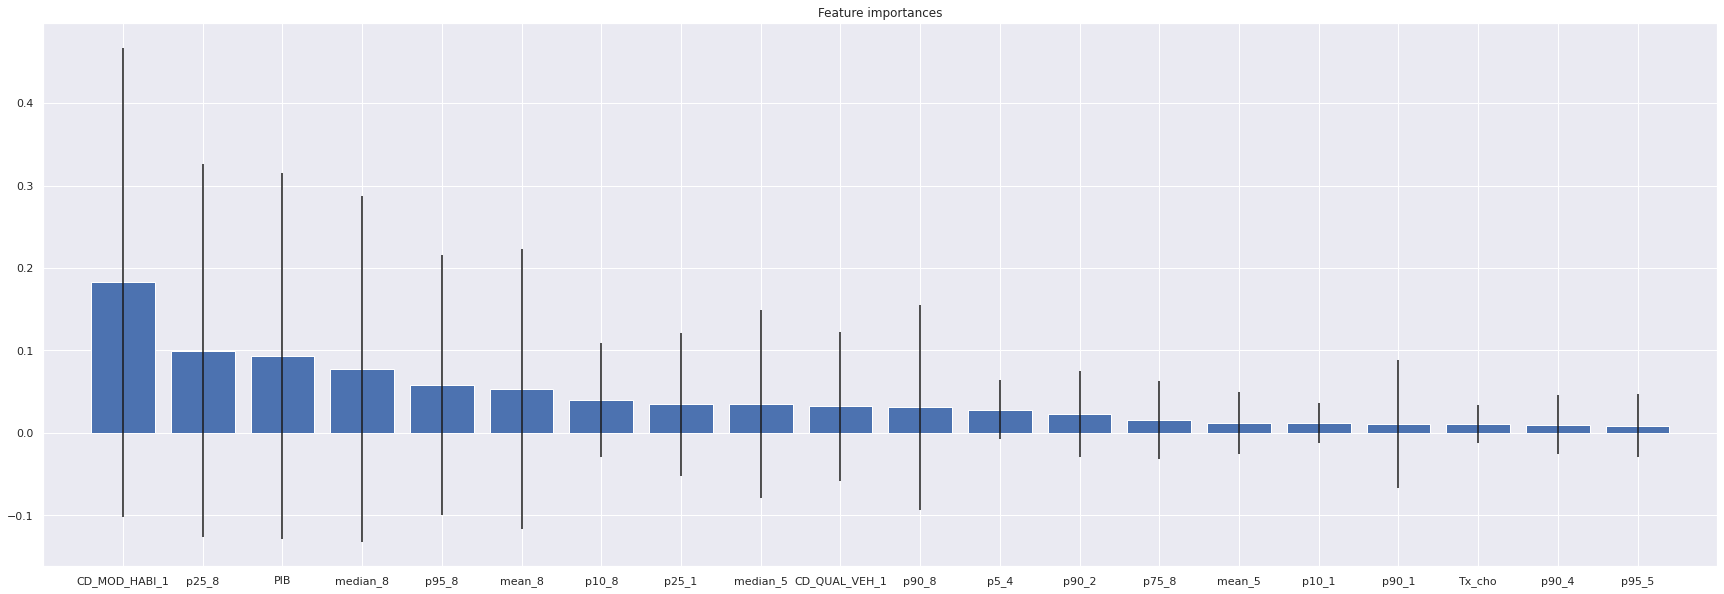

In [93]:
#plot the importances #
importances = etc.feature_importances_
std = np.std([tree.feature_importances_ for tree in etc.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1][:20]
indices_names = list(map(lambda x : X2.columns[x],indices))
plt.figure(figsize=(30,10))
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices],
       color="b", yerr=std[indices], align="center")
plt.xticks(range(len(indices)), indices_names)
plt.xlim([-1, len(indices)])
plt.show()

## Sequential Feature Selection 

In [94]:
# forward
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector
linreg = LinearRegression(fit_intercept=False)
sfs_forward = SequentialFeatureSelector(linreg, n_features_to_select=20, direction='forward').fit(X2, Y2)
col_2_sfs_forward  = X2.loc[:,sfs_forward .get_support()].columns
print(f'Il y a {len(col_2_sfs_forward )} variables:', col_2_sfs_forward ,sep='\n')

Il y a 20 variables:
Index(['p5_2', 'p25_2', 'mean_3', 'median_3', 'p10_3', 'p90_3', 'p95_3',
       'mean_4', 'median_6', 'p5_6', 'p10_6', 'p25_6', 'p75_6', 'p90_6',
       'p95_6', 'p25_7', 'mean_8', 'CD_PROF_1', 'CD_QUAL_VEH_1', 'PIB'],
      dtype='object')


In [95]:
# backward
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector
linreg = LinearRegression(fit_intercept=False)
sfs_backward = SequentialFeatureSelector(linreg, n_features_to_select=20, direction='backward').fit(X2, Y2)
col_2_sfs_backward  = X2.loc[:,sfs_backward .get_support()].columns
print(f'Il y a {len(col_2_sfs_backward )} variables:', col_2_sfs_backward ,sep='\n')

Il y a 20 variables:
Index(['mean_2', 'median_2', 'p5_2', 'p25_2', 'p75_2', 'p90_2', 'p95_2',
       'p5_3', 'p10_3', 'mean_4', 'median_4', 'p5_4', 'p90_4', 'mean_5',
       'median_5', 'p5_5', 'p10_5', 'p25_5', 'p75_5', 'p90_5'],
      dtype='object')


## Show what feature was selected

In [96]:
cols_feature_selection_2 = [new_col_2_naive,col_2_corr,col_2_vt,col_2_kb,col_2_rfecv,col_2_sfm,col_2_sfm2,col_2_sfs_forward,col_2_sfs_backward]
method = ['Approche naive', 'Methode correlation','Low variance methode','Methode Kbest','Methode RFECV','Methode SelectFromModel','Method Tree','Methode sequential forward','Methode sequential backward']

In [97]:
for cols, met in zip(cols_feature_selection_2,method):
  print('-'*40)
  print(f'{met}: {len(cols)} variables')
  print(*cols)
print('-'*40,end='\n')

----------------------------------------
Approche naive: 14 variables
p25_1 median_2 mean_4 mean_5 median_5 p90_5 p95_5 median_8 p10_8 p25_8 CD_PROF_1 CD_QUAL_VEH_1 PIB Tx_cho
----------------------------------------
Methode correlation: 5 variables
mean_8 CD_QUAL_VEH_1 mean_5 p25_8 median_5
----------------------------------------
Low variance methode: 35 variables
mean_2 median_2 p5_2 p10_2 p25_2 p75_2 p90_2 p95_2 mean_3 median_3 p5_3 p10_3 p25_3 p75_3 p90_3 p95_3 mean_4 median_4 p5_4 p10_4 p25_4 p75_4 p90_4 p95_4 mean_5 median_5 p5_5 p10_5 p25_5 p75_5 p90_5 p95_5 PIB Inflation Tx_cho
----------------------------------------
Methode Kbest: 20 variables
median_1 p10_1 p25_1 p90_1 p5_4 p10_4 p25_4 mean_5 median_5 mean_6 mean_8 median_8 p5_8 p10_8 p25_8 p90_8 p95_8 CD_MOD_HABI_1 CD_QUAL_VEH_1 PIB
----------------------------------------
Methode RFECV: 15 variables
mean_1 median_1 p5_1 p10_1 p75_1 p90_1 p95_1 p25_8 p75_8 p90_8 CD_ETA_CIV_1 CD_MOD_HABI_1 CD_PROF_1 CD_PROF_2 CD_QUAL_VEH_1


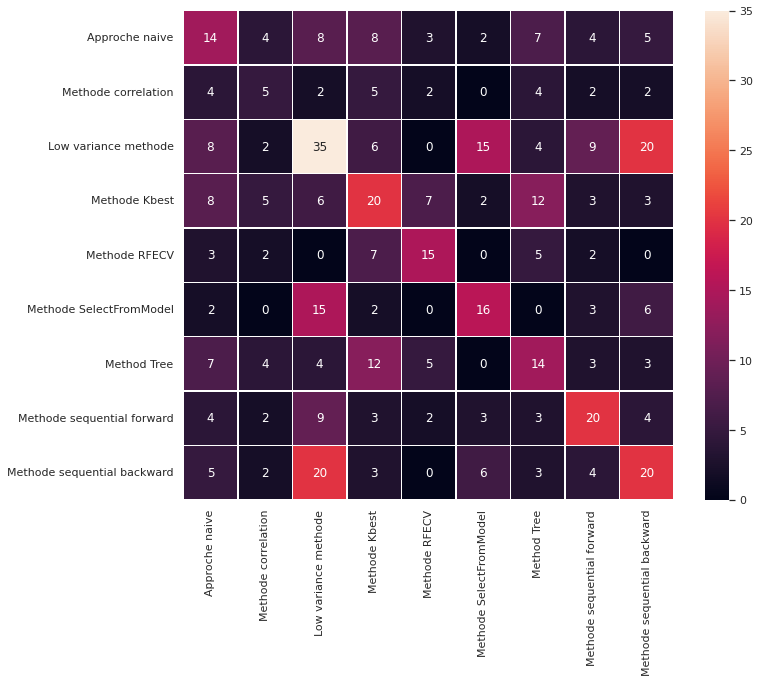

In [98]:
import itertools
df_common = pd.DataFrame(columns=method, index=method)
for i, j in itertools.product(range(len(method)),range(len(method))):
  col1, col2 = cols_feature_selection_2[i], cols_feature_selection_2[j]
  method1, method2 = method[i], method[j]
  n_common = len(set(col1).intersection(col2))
  df_common.loc[method1,method2] = n_common

fig, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(df_common.astype('float64'), annot=True,linewidth=.5,ax=ax)
plt.show()

# Feature selection de chronique 8

## Approche naive par analyse des graphiques 

In [99]:
X8.columns

Index(['mean_1', 'median_1', 'p5_1', 'p10_1', 'p25_1', 'p75_1', 'p90_1',
       'p95_1', 'mean_2', 'median_2', 'p5_2', 'p10_2', 'p25_2', 'p75_2',
       'p90_2', 'p95_2', 'mean_3', 'median_3', 'p5_3', 'p10_3', 'p25_3',
       'p75_3', 'p90_3', 'p95_3', 'mean_4', 'median_4', 'p5_4', 'p10_4',
       'p25_4', 'p75_4', 'p90_4', 'p95_4', 'mean_5', 'median_5', 'p5_5',
       'p10_5', 'p25_5', 'p75_5', 'p90_5', 'p95_5', 'mean_6', 'median_6',
       'p5_6', 'p10_6', 'p25_6', 'p75_6', 'p90_6', 'p95_6', 'mean_7',
       'median_7', 'p5_7', 'p10_7', 'p25_7', 'p75_7', 'p90_7', 'p95_7',
       'mean_8', 'median_8', 'p5_8', 'p10_8', 'p25_8', 'p75_8', 'p90_8',
       'p95_8', 'CD_TY_CLI_RCI_1', 'CD_ETA_CIV_1', 'CD_MOD_HABI_1',
       'CD_PROF_1', 'CD_PROF_2', 'CD_QUAL_VEH_1', 'PIB', 'Inflation',
       'Tx_cho'],
      dtype='object')

In [100]:
col_8_naive = ['mean_1','p5_1', 'p25_1',
               'p5_2', 'p10_2', 
       'mean_3', 
       'mean_4',
       'p10_5', 'p25_5', 
        'median_6',
      'p25_6', 'p90_6', 'p95_6', 
       'median_8', 'p90_8',
       'CD_TY_CLI_RCI_1', 'CD_ETA_CIV_1', 'CD_MOD_HABI_1',
       'PIB', 'Inflation']
new_col_8_naive = col_8_naive

On supprime la première ligne car elle peut biaiser le modèle, valeur de DR=0.024

                                 OLS Regression Results                                
Dep. Variable:                     DR   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                              4038.
Date:                Sun, 20 Nov 2022   Prob (F-statistic):                    3.42e-09
Time:                        14:14:13   Log-Likelihood:                          133.67
No. Observations:                  25   AIC:                                     -227.3
Df Residuals:                       5   BIC:                                     -203.0
Df Model:                          20                                                  
Covariance Type:            nonrobust                                                  
                      coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------

Text(0.5, 1.0, 'mse =1.328791022231985e-06')

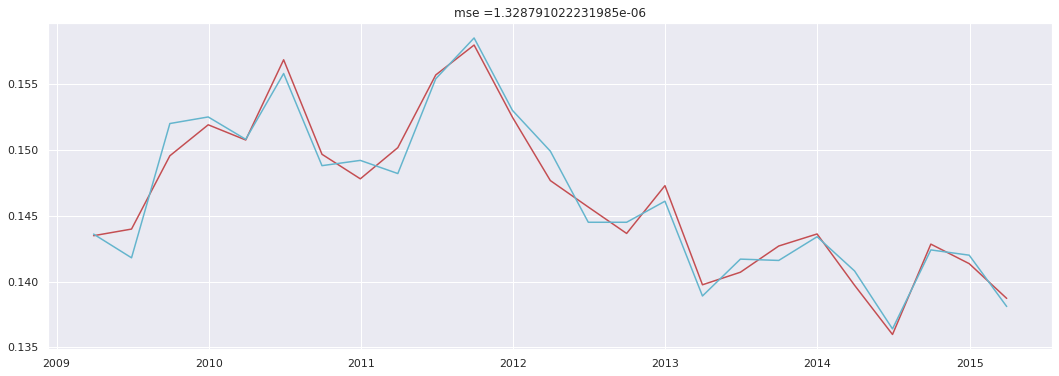

In [101]:
Xnaif = df8[col_8_naive].iloc[1:,]
Ynaif = Y8[1:]
model = sm.OLS(Ynaif, Xnaif)
results = model.fit()
print(results.summary())
plt.plot(results.predict(Xnaif),color='r')
plt.plot(Ynaif,color='c')
from sklearn.metrics import mean_squared_error
plt.title('mse ='+ str(mean_squared_error(results.predict(Xnaif), Ynaif)))

## Analyse des correlations

In [102]:
def corre(X,Y):
  X.insert(0, 'DR', Y)
  cor = X.corr()
  sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
  plt.show()

### Analyse des variables caractéristiques du portfeuille

In [103]:
col_8_corr = []

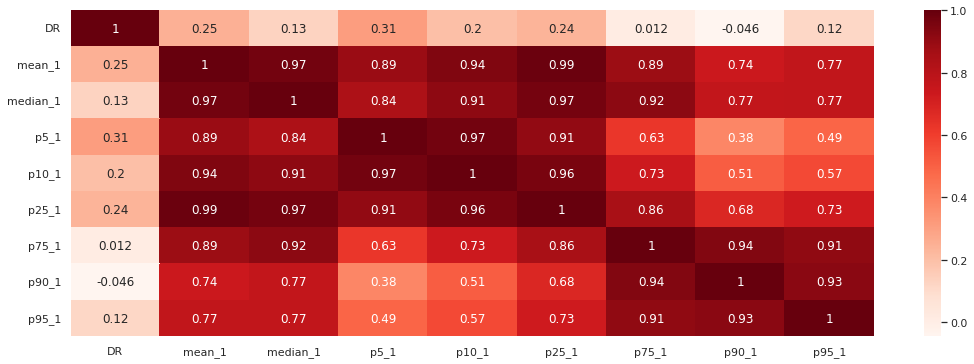

In [104]:
# Note d'octroi recalulée
corre(X8[col_portefeuille[0:8]],Y8)

In [105]:
#col_8_corr += ['mean_1','p90_1']

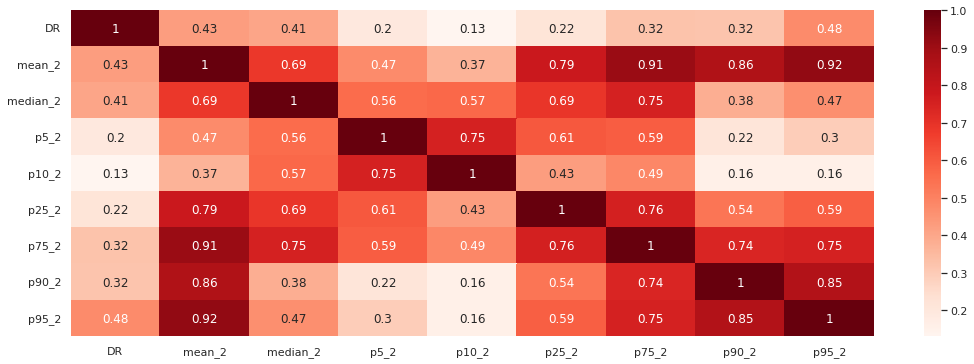

In [106]:
#Durée écoulée depuis le dernier impayé
corre(X8[col_portefeuille[8:16]],Y8)

In [107]:
#col_8_corr += ['mean_2','p90_2']

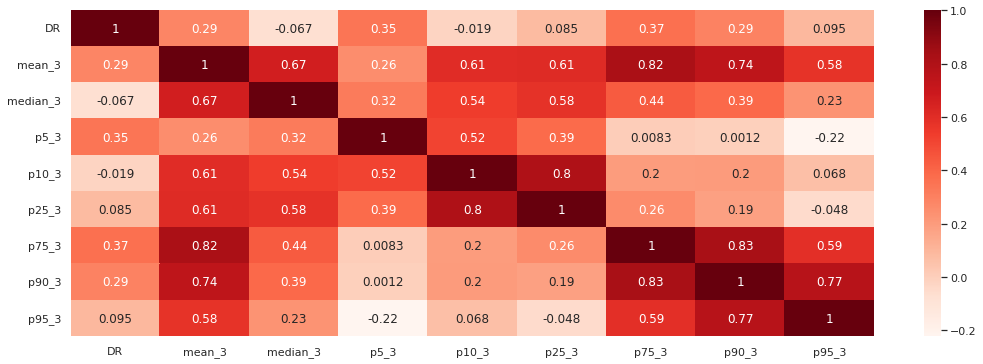

In [108]:
# Durée de l'impayé encours
corre(X8[col_portefeuille[16:24]],Y8)

In [109]:
#col_8_corr += ['mean_3','p90_3','p95_']

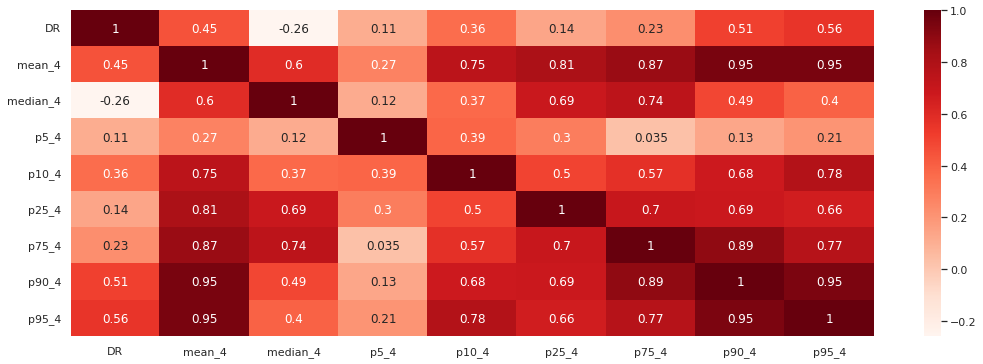

In [110]:
# Durée maximale de l'impayé
corre(X8[col_portefeuille[24:32]],Y8)

In [111]:
#col_8_corr += ['p5_4']

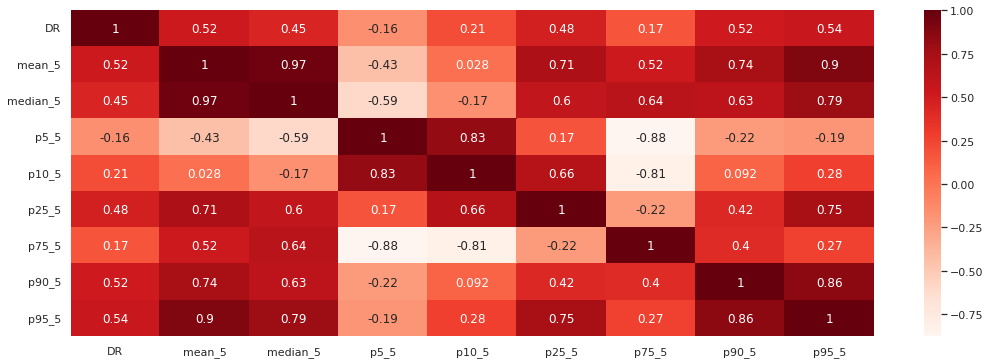

In [112]:
# Créance après répartition solde créditeurs
corre(X8[col_portefeuille[32:40]],Y8)

In [113]:
#col_8_corr += ['median_5']

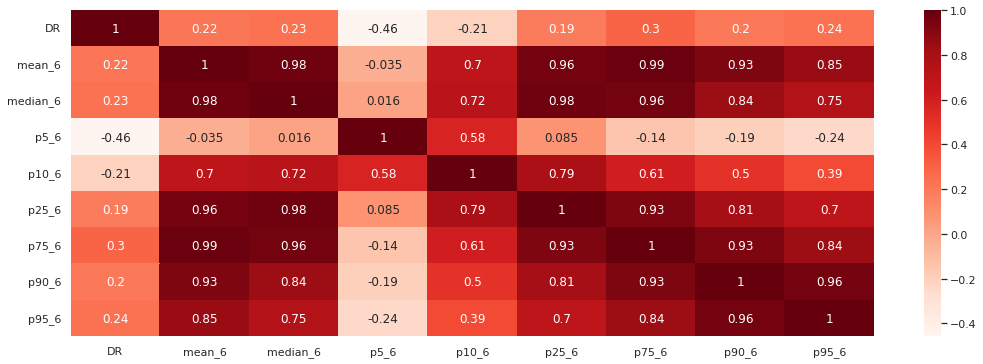

In [114]:
# Ratio nombre d'incidents régularisés enregistrés depuis la date d'entrée en gestion
corre(X8[col_portefeuille[40:48]],Y8)

In [115]:
#col_8_corr += ['mean_6','p90_6','p95_6']

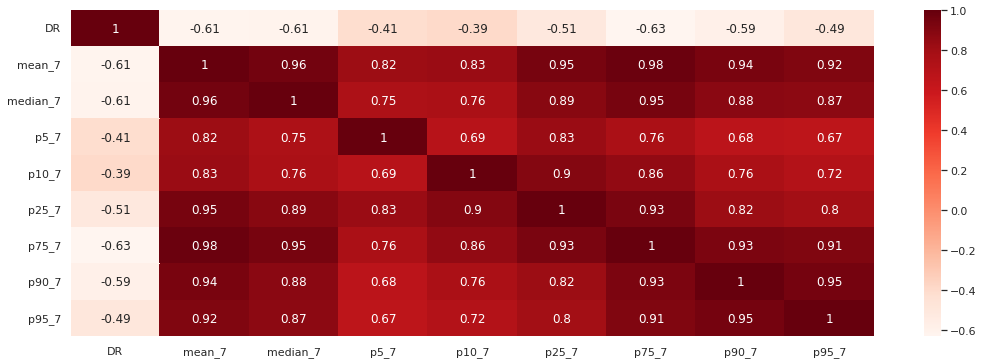

In [116]:
# Ratio rang du premier impayé régularisé par rapport à la durée prévue du contrat
corre(X8[col_portefeuille[48:56]],Y8)

In [117]:
col_8_corr += ['mean_7','median_7','p75_7']

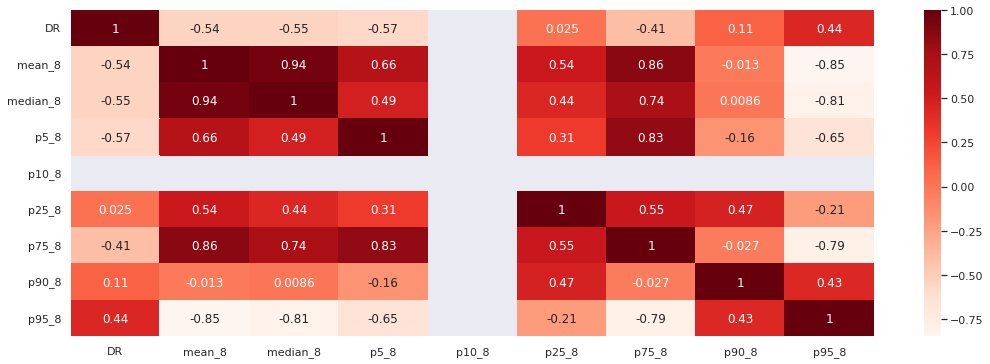

In [118]:
# Pourcentage apport
corre(X8[col_portefeuille[56:64]],Y8)

In [119]:
#col_8_corr += ['mean_8','median_8','p25_8']

### Analyse des variables caractéristiques des clients

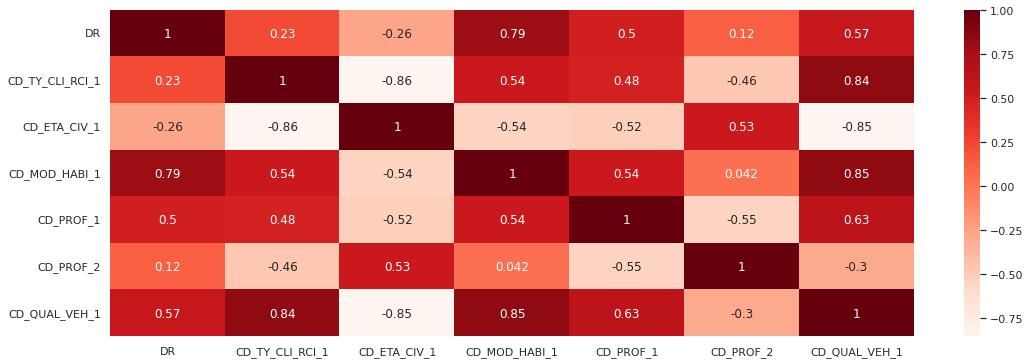

In [120]:
corre(X8[col_clients],Y8)

In [121]:
col_8_corr += ['CD_MOD_HABI_1']

### Analyse des variables macro

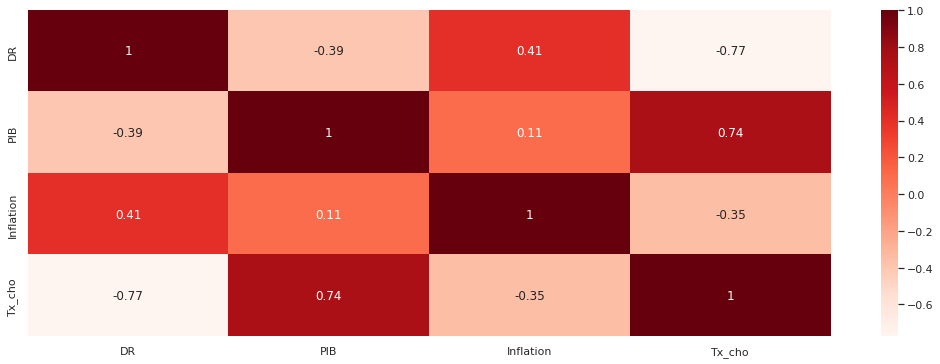

In [122]:
corre(X8[col_macro],Y8)

In [123]:
col_8_corr += ['PIB','Tx_cho']

### Multicollinéarité test
On va analyser les différentes colonnes obtenues et enlever les variables qui sont trop colinéaires entre elles

In [124]:
"""
def keep_col(df,tresholdDR,interTreshold):
  df_temp = df.copy()
  df_temp.insert(loc=0, column='DR', value=Y8.values)
  corr_matrix = df_temp.corr()
  *index, = map(lambda x: abs(x)>tresholdDR,corr_matrix.loc['DR'])
  print('Columns with corr with DR >' +str(tresholdDR)+':',df_temp.columns[index].values[1:],str(index.count(True)-1)+' variables',sep='\n')
  
  print('\n','After studying inter correlation')
  keep_col = set()
  cols = df_temp.columns[index].values[1:]
  for col1 in cols:
    for col2 in cols:
      if col1 != col2 and abs(corr_matrix.loc[col1,col2])>interTreshold:
        col_to_keep =corr_matrix.loc['DR',[col1,col2]].idxmax()
        keep_col.add(col_to_keep)
  print('Columns with inter corr<' +str(interTreshold)+':',keep_col,str(len(keep_col))+' variables',sep='\n')
  return list(keep_col)
"""

"\ndef keep_col(df,tresholdDR,interTreshold):\n  df_temp = df.copy()\n  df_temp.insert(loc=0, column='DR', value=Y8.values)\n  corr_matrix = df_temp.corr()\n  *index, = map(lambda x: abs(x)>tresholdDR,corr_matrix.loc['DR'])\n  print('Columns with corr with DR >' +str(tresholdDR)+':',df_temp.columns[index].values[1:],str(index.count(True)-1)+' variables',sep='\n')\n  \n  print('\n','After studying inter correlation')\n  keep_col = set()\n  cols = df_temp.columns[index].values[1:]\n  for col1 in cols:\n    for col2 in cols:\n      if col1 != col2 and abs(corr_matrix.loc[col1,col2])>interTreshold:\n        col_to_keep =corr_matrix.loc['DR',[col1,col2]].idxmax()\n        keep_col.add(col_to_keep)\n  print('Columns with inter corr<' +str(interTreshold)+':',keep_col,str(len(keep_col))+' variables',sep='\n')\n  return list(keep_col)\n"

In [125]:
#col_8_corr = keep_col(Xt[col_8_corr],0.60,0.90)

### Conclusion

In [126]:
col_8_corr = list(set(col_8_corr))
print(f'Il y a {len(col_8_corr)} variables:', col_8_corr,sep='\n')

Il y a 6 variables:
['CD_MOD_HABI_1', 'Tx_cho', 'median_7', 'mean_7', 'PIB', 'p75_7']


## Low variance method

In [127]:
from sklearn.feature_selection import VarianceThreshold
vt = VarianceThreshold(threshold =0.25).fit(X8)
col_8_vt = X8.loc[:,vt.get_support()].columns
print(f'Il y a {len(col_8_vt)} variables:', col_8_vt,sep='\n')

Il y a 33 variables:
Index(['mean_2', 'median_2', 'p5_2', 'p10_2', 'p25_2', 'p75_2', 'p90_2',
       'p95_2', 'mean_3', 'median_3', 'p5_3', 'p10_3', 'p25_3', 'p75_3',
       'p90_3', 'p95_3', 'mean_4', 'median_4', 'p25_4', 'p75_4', 'p90_4',
       'p95_4', 'mean_5', 'median_5', 'p5_5', 'p10_5', 'p25_5', 'p75_5',
       'p90_5', 'p95_5', 'PIB', 'Inflation', 'Tx_cho'],
      dtype='object')


## Kbest method

In [128]:
from sklearn.feature_selection import SelectKBest, f_regression
kb = SelectKBest(f_regression, k=20).fit(X8, Y8)
col_8_kb = X8.loc[:,kb.get_support()].columns
print(f'Il y a {len(col_8_kb)} variables:', col_8_kb,sep='\n')

Il y a 20 variables:
Index(['p95_2', 'p90_4', 'p95_4', 'mean_5', 'p25_5', 'p90_5', 'p95_5',
       'mean_7', 'median_7', 'p25_7', 'p75_7', 'p90_7', 'p95_7', 'mean_8',
       'median_8', 'p5_8', 'CD_MOD_HABI_1', 'CD_PROF_1', 'CD_QUAL_VEH_1',
       'Tx_cho'],
      dtype='object')


/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:289: RuntimeWarning: invalid value encountered in true_divide
  correlation_coefficient /= X_norms


## Recursive feature elimination with cross-validation to select features.



In [129]:
from sklearn.feature_selection import RFECV
from sklearn.linear_model import LinearRegression

linreg = LinearRegression(fit_intercept=False)
rfecv = RFECV(linreg, step=1, min_features_to_select=15, cv=8).fit(X8, Y8)
col_8_rfecv = X8.loc[:,rfecv.get_support()].columns
print(f'Il y a {len(col_8_rfecv)} variables:', col_8_rfecv,sep='\n')


Il y a 15 variables:
Index(['mean_1', 'median_1', 'p5_1', 'p10_1', 'p95_1', 'median_7', 'p5_7',
       'p10_7', 'p95_7', 'p5_8', 'p25_8', 'p90_8', 'p95_8', 'CD_ETA_CIV_1',
       'CD_QUAL_VEH_1'],
      dtype='object')


## Feature selection using SelectFromModel

In [130]:
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LinearRegression
linreg = LinearRegression(fit_intercept=False)
sfm = SelectFromModel(linreg).fit(X8, Y8)
col_8_sfm  = Xt.loc[:,sfm .get_support()].columns
print(f'Il y a {len(col_8_sfm )} variables:', col_8_sfm ,sep='\n')


Il y a 22 variables:
Index(['mean_2', 'median_2', 'p10_2', 'p75_2', 'p90_2', 'mean_3', 'median_3',
       'p5_3', 'p10_3', 'p25_3', 'p75_3', 'p90_3', 'p95_3', 'median_4', 'p5_4',
       'p10_4', 'p25_4', 'p75_4', 'p90_4', 'p95_4', 'Inflation', 'Tx_cho'],
      dtype='object')


## Tree-based feature selection

In [131]:
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.feature_selection import SelectFromModel
etc = ExtraTreesRegressor(n_estimators=50).fit(X8, Y8)
sfm2 = SelectFromModel(etc, prefit=True)
col_8_sfm2  = X8.loc[:,sfm2 .get_support()].columns
print(f'Il y a {len(col_8_sfm2 )} variables:', col_8_sfm2 ,sep='\n')


Il y a 23 variables:
Index(['p10_1', 'p90_1', 'mean_2', 'median_2', 'p75_2', 'p95_2', 'mean_3',
       'p5_3', 'median_4', 'p95_4', 'mean_5', 'p75_5', 'mean_6', 'median_6',
       'p75_6', 'p90_6', 'p95_6', 'mean_8', 'median_8', 'p5_8',
       'CD_MOD_HABI_1', 'CD_PROF_1', 'Tx_cho'],
      dtype='object')


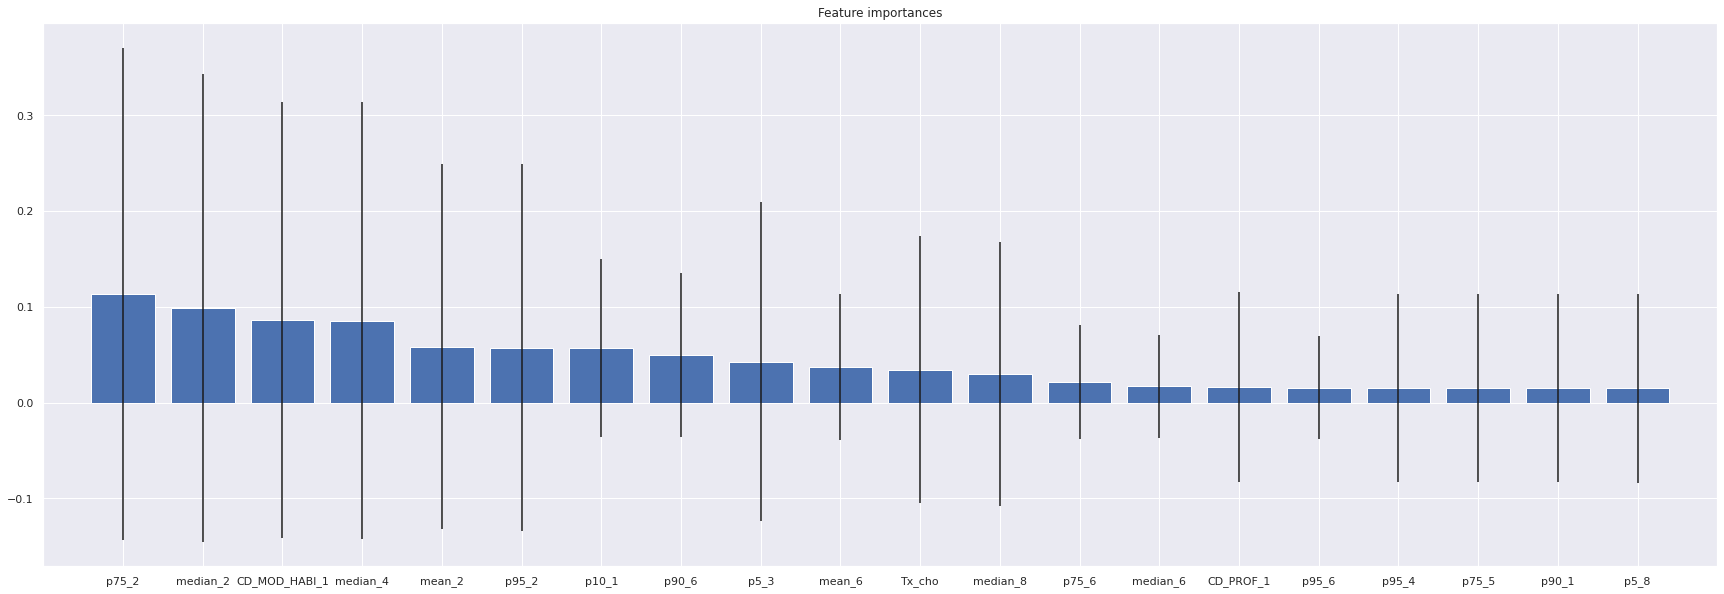

In [132]:
#plot the importances #
importances = etc.feature_importances_
std = np.std([tree.feature_importances_ for tree in etc.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1][:20]
indices_names = list(map(lambda x : X8.columns[x],indices))
plt.figure(figsize=(30,10))
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices],
       color="b", yerr=std[indices], align="center")
plt.xticks(range(len(indices)), indices_names)
plt.xlim([-1, len(indices)])
plt.show()

## Sequential Feature Selection 

In [133]:
# forward
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector
linreg = LinearRegression(fit_intercept=False)
sfs_forward = SequentialFeatureSelector(linreg, n_features_to_select=20, direction='forward').fit(X8, Y8)
col_8_sfs_forward  = X8.loc[:,sfs_forward .get_support()].columns
print(f'Il y a {len(col_8_sfs_forward )} variables:', col_8_sfs_forward ,sep='\n')

Il y a 20 variables:
Index(['p90_2', 'p95_2', 'median_3', 'p75_3', 'p95_3', 'median_4', 'p25_4',
       'p10_5', 'p5_6', 'p10_6', 'mean_7', 'median_7', 'p5_7', 'p25_7',
       'p90_7', 'median_8', 'p10_8', 'p25_8', 'p75_8', 'p95_8'],
      dtype='object')


In [134]:
# backward
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import SequentialFeatureSelector
linreg = LinearRegression(fit_intercept=False)
sfs_backward = SequentialFeatureSelector(linreg, n_features_to_select=20, direction='backward').fit(X8, Y8)
col_8_sfs_backward  = X8.loc[:,sfs_backward .get_support()].columns
print(f'Il y a {len(col_8_sfs_backward )} variables:', col_8_sfs_backward ,sep='\n')

Il y a 20 variables:
Index(['median_2', 'p25_2', 'p75_2', 'p90_2', 'p95_2', 'p25_3', 'p75_3',
       'p90_3', 'p95_3', 'mean_4', 'median_4', 'p10_4', 'p25_4', 'p75_4',
       'p90_4', 'p95_4', 'median_5', 'p25_5', 'p75_5', 'p95_5'],
      dtype='object')


## Show what feature was selected

In [135]:
cols_feature_selection_8 = [new_col_8_naive,col_8_corr,col_8_vt,col_8_kb,col_8_rfecv,col_8_sfm,col_8_sfm2,col_8_sfs_forward,col_8_sfs_backward]
method = ['Approche naive', 'Methode correlation','Low variance methode','Methode Kbest','Methode RFECV','Methode SelectFromModel','Method Tree','Methode sequential forward','Methode sequential backward']

In [136]:
for cols, met in zip(cols_feature_selection_8,method):
  print('-'*40)
  print(f'{met}: {len(cols)} variables')
  print(*cols)
print('-'*40,end='\n')

----------------------------------------
Approche naive: 20 variables
mean_1 p5_1 p25_1 p5_2 p10_2 mean_3 mean_4 p10_5 p25_5 median_6 p25_6 p90_6 p95_6 median_8 p90_8 CD_TY_CLI_RCI_1 CD_ETA_CIV_1 CD_MOD_HABI_1 PIB Inflation
----------------------------------------
Methode correlation: 6 variables
CD_MOD_HABI_1 Tx_cho median_7 mean_7 PIB p75_7
----------------------------------------
Low variance methode: 33 variables
mean_2 median_2 p5_2 p10_2 p25_2 p75_2 p90_2 p95_2 mean_3 median_3 p5_3 p10_3 p25_3 p75_3 p90_3 p95_3 mean_4 median_4 p25_4 p75_4 p90_4 p95_4 mean_5 median_5 p5_5 p10_5 p25_5 p75_5 p90_5 p95_5 PIB Inflation Tx_cho
----------------------------------------
Methode Kbest: 20 variables
p95_2 p90_4 p95_4 mean_5 p25_5 p90_5 p95_5 mean_7 median_7 p25_7 p75_7 p90_7 p95_7 mean_8 median_8 p5_8 CD_MOD_HABI_1 CD_PROF_1 CD_QUAL_VEH_1 Tx_cho
----------------------------------------
Methode RFECV: 15 variables
mean_1 median_1 p5_1 p10_1 p95_1 median_7 p5_7 p10_7 p95_7 p5_8 p25_8 p90_8 p9

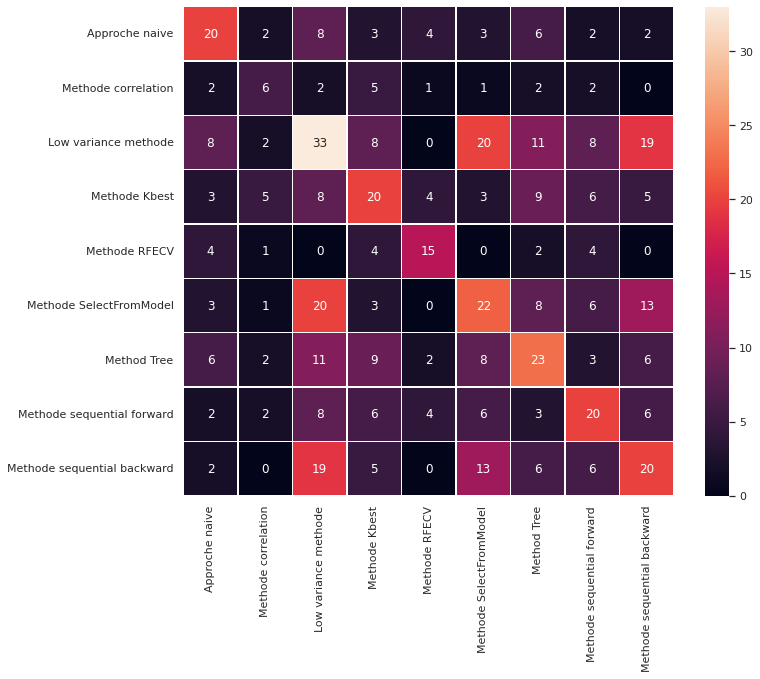

In [137]:
import itertools
df_common = pd.DataFrame(columns=method, index=method)
for i, j in itertools.product(range(len(method)),range(len(method))):
  col1, col2 = cols_feature_selection_8[i], cols_feature_selection_8[j]
  method1, method2 = method[i], method[j]
  n_common = len(set(col1).intersection(col2))
  df_common.loc[method1,method2] = n_common

fig, ax = plt.subplots(figsize=(11, 9))
sns.heatmap(df_common.astype('float64'), annot=True,linewidth=.5,ax=ax)
plt.show()